# Importing all Libraries

In [1]:
# Importing the NumPy and Pandas
import numpy as np
import pandas as pd

#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Importing Stats library
from scipy import stats
import statsmodels.api as sm

#Importing scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#importing warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
#reading the csv file using pandas
leads = pd.read_csv("Leads.csv")
leads.head() #checking the first 5 rows of the dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the shape of the dataset
leads.shape

(9240, 37)

So, there are
- 9240 rows
- 37 columns or can say features

In [4]:
#Checking the columns d-type
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are some categorical variables, so we will need to create dummy variables.

In [5]:
#checking the describe function for numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


object     30
float64     4
int64       3
dtype: int64


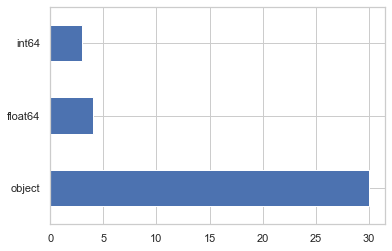

In [6]:
#Counting each type of datatype of the columns in the dataset
types = leads.dtypes                      #Storing all the datatypes in a variable
print(types.value_counts())
types.value_counts().plot.barh()        #Visualization of each datatype through barplot 
plt.show()

In [7]:
#Checking for entire duplicate rows present in the dataset.
leads.duplicated().sum()  #As the output is 0 it means that there are no two rows which are entirely identical.

0

# EDA

## Data cleaning and preparation

In [8]:
# To check for duplicates in columns
print(sum(leads.duplicated(subset = 'Lead Number')))
print(sum(leads.duplicated(subset = 'Prospect ID')))

0
0


As the columns Prospect id and lead number has zero null values and all are unique values and act as a unique identifier for the users it wont help us in our analysis so lets drop these columns.

In [9]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [10]:
leads.shape

(9240, 35)

In [11]:
#Checking the value counts for columns
for col in leads.columns:
    print(leads[col].value_counts())
    print("-----------------------")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
-----------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64
-----------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
-----------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
-----------------------
0    5679
1    3561
N

In [12]:
#A function for finding the percentage of null values in each column in the given dataset
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)  

#Here we are rounding the number upto 2 decimal points and sorting so that 
#the columns with big percentage of missing values are shown at the top

In [13]:
#Function for creating the percentage plots for categorical columns
def percentage_plot(col):
    values = (leads[col].value_counts(normalize=True)*100)
    values.plot.bar(color=sns.color_palette('muted'))
    plt.xlabel(col)
    plt.ylabel('% in the dataset')
    plt.show()

In [14]:
#Checking the percentage of null values present in the columns
null_values(leads)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

Before just dropping all the variables with null percentage more then 40, we have to treat the "select" value present in some columns. As upon inspection of the columns there are four columns which have "select" value, they are "Specialization", "How did you hear about X Education", "Lead Profile" and "City".

As it is given that these are as good as null values so we will replace these values with nan. These are like this bacause most probably these users didnt want to give these information and left unattended and submitted beacuse of which these are missing.

In [15]:
# To convert 'Select' values to NaN
leads = leads.replace('Select', np.nan)

In [16]:
#Now again checking null percentage
null_values(leads)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted 

In [17]:
#Dropping values which have 40% or more missing values. As they wont help us much in our analysis
nul_values_gr_40 = null_values(leads)[null_values(leads) > 40]
nul_values_gr_40

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Index           45.65
dtype: float64

Here, even though Lead profile might help us in our analysis but in that column we have 74%missing values which will not be of any help even though if it is important so we will drop it. 

Coming to the case of Lead Quality we will try to retain it as it may give some information or may help in our analysis.

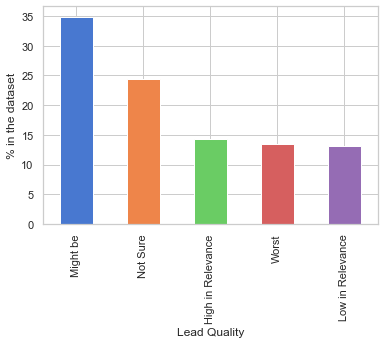

In [18]:
#Visualizing Lead Quality
percentage_plot("Lead Quality")

Here, as you can see we can impute the null values with the value "not sure" as it will not effect our analysis to assume it. Based on the data dictionary the employer might be not sure thats why left is blank. So here in this case it will be safe to assume the null values to be not sure.

In [19]:
#replacing the values
leads["Lead Quality"] = leads["Lead Quality"].replace(np.nan, "Not Sure")

Now for the other remaining columns they are not important in our analysis so lets drop them. And if you observe even the city column as 39% missing values, which is very close to 40 and it will also not help in our analysis so lets drop this too.

In [20]:
leads.drop(["How did you hear about X Education", "Lead Profile", 
            "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index", 
           "Asymmetrique Activity Index", "City"], axis = 1, inplace = True)

In [21]:
leads.shape

(9240, 28)

In [22]:
null_values(leads)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

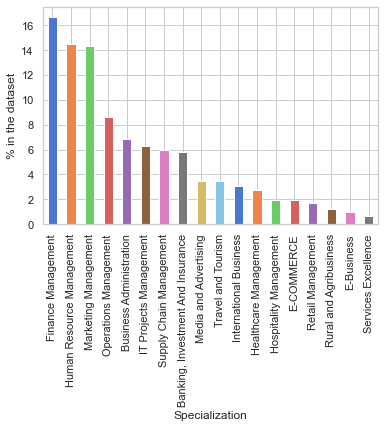

In [23]:
#Now lets see Specialization column
percentage_plot("Specialization")

Here as there are many Specialization available and their values are also close to each other so it not be good if we try to impute the null values with the mode. So, lets create a other value called "others" and assign null values to it.

In [24]:
leads["Specialization"] = leads["Specialization"].replace(np.nan, "Others")

In [25]:
leads["Specialization"].isnull().sum() #cheking for null values

0

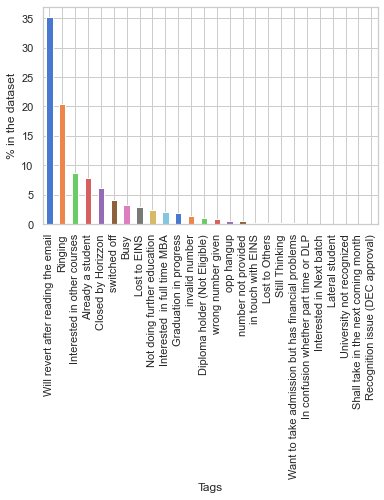

In [26]:
#Now lets see Tags column
percentage_plot("Tags")

In [27]:
#Lets impute the missing values using mode in this case
leads.Tags.mode()

0    Will revert after reading the email
dtype: object

In [28]:
leads.Tags = leads.Tags.fillna(leads.Tags.mode()[0])
leads.Tags.isnull().sum()#cheking for null values

0

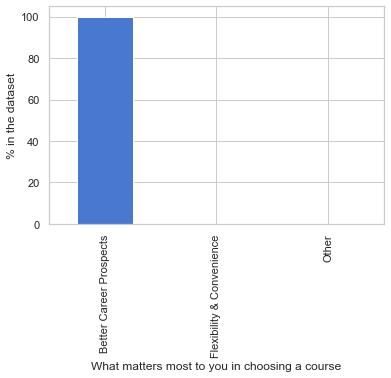

In [29]:
#Now lets see What matters most to you in choosing a course column
percentage_plot("What matters most to you in choosing a course")

In [30]:
#Lets impute the missing values using mode in this case
leads["What matters most to you in choosing a course"].mode()

0    Better Career Prospects
dtype: object

In [31]:
leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].fillna(leads["What matters most to you in choosing a course"].mode()[0])
leads["What matters most to you in choosing a course"].isnull().sum()#cheking for null values

0

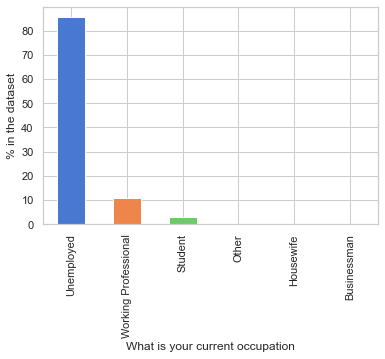

In [32]:
#Now lets see What is your current occupation column
percentage_plot("What is your current occupation")

In [33]:
#Lets impute the missing values using mode in this case
leads["What is your current occupation"].mode()

0    Unemployed
dtype: object

In [34]:
leads["What is your current occupation"] = leads["What is your current occupation"].fillna(leads["What is your current occupation"].mode()[0])
leads["What is your current occupation"].isnull().sum() #checking for null values

0

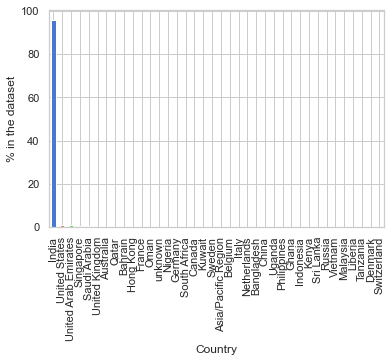

In [35]:
#Now lets see Country column
percentage_plot("Country")

In [36]:
#Lets impute the missing values using mode in this case
leads["Country"].mode()

0    India
dtype: object

In [37]:
leads.Country = leads.Country.fillna(leads.Country.mode()[0])
leads.Country.isnull().sum() #checking for the null values

0

In [38]:
null_values(leads)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

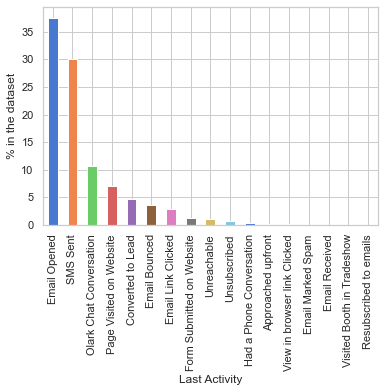

In [39]:
#Now lets see Last Activity column
percentage_plot("Last Activity")

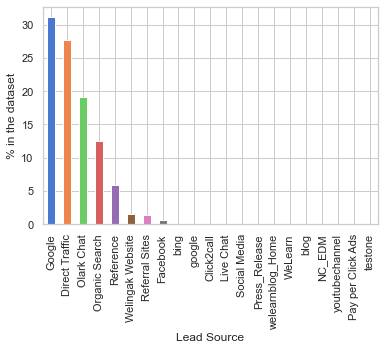

In [40]:
#Now lets see Lead Source column
percentage_plot("Lead Source")

In both of these columns Last Activity and Lead Source the value of missing percentage is less than 2% and more than 1 variable are kind of frequent so lets not impute it with mode instead we will drop the rows which are having missing values in these case.

### Numerical variables Visualization

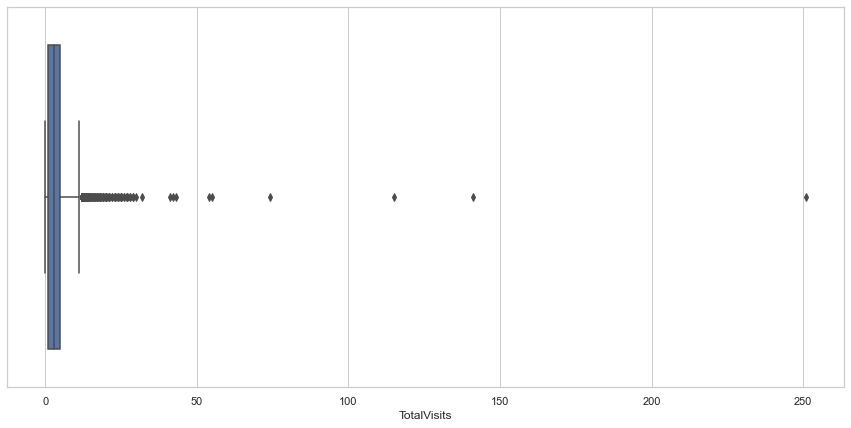

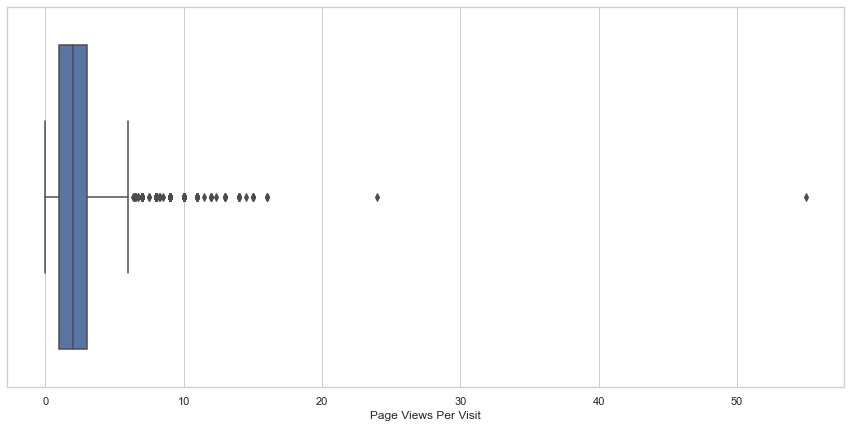

In [41]:
#Lets see the boxplot for the numerical columns TotalVisits and Page Views Per Visit
num_list = ["TotalVisits", "Page Views Per Visit"]
for col in num_list:
    plt.figure(figsize = [15,7])
    sns.boxplot(leads[col])
    plt.show()

In [42]:
leads[num_list].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


Here, also lets just drop the rows with missing values and they are less than 2%.

In [43]:
#Lets drop rows with the na values from the columns
leads.dropna(inplace = True)

In [44]:
null_values(leads)

Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

Now lets do the outlier treatment for the numerical variables

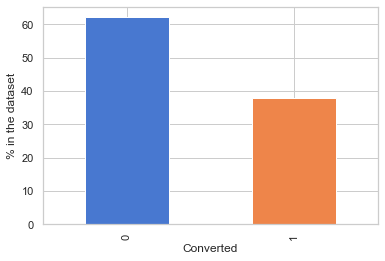

In [45]:
#Lets see the converted column
percentage_plot("Converted")

In [46]:
conversion_percent = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion_percent

37.85541106458012

37.8% of people are converted.

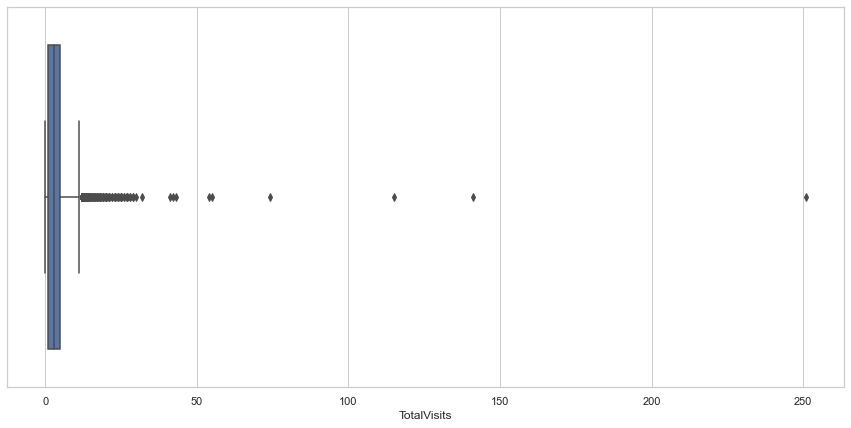

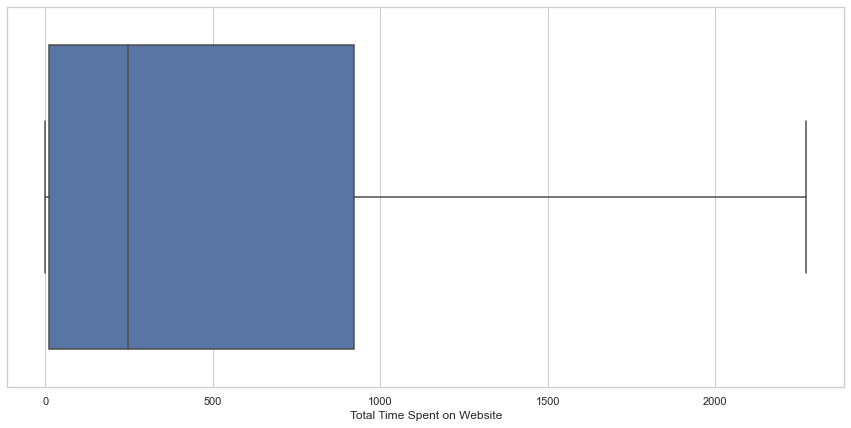

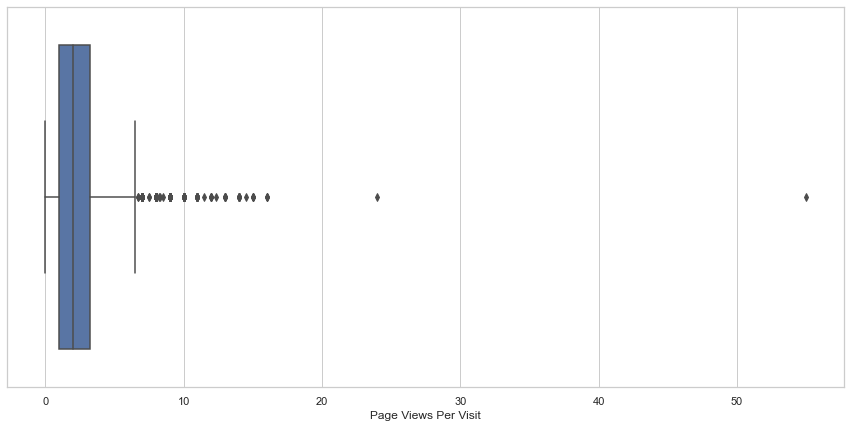

In [47]:
num_col = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
for col in num_col:
    plt.figure(figsize = [15,7])
    sns.boxplot(leads[col])
    plt.show()

In [48]:
leads[num_col].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


So, from the boxplots and the describe function we can see that
- "TotalVisits" column has 95% quantile as 10 and max value to be 251. So, lets do capping these for these to 95% quantile.
- "Total Time Spent on Website" as there are no major outlier present not need for treatment here.
- "Page Views Per Visit" column has 95% quantile as 6 and max value to be 55. So, here also lets do capping to the 95% quantile.

In [49]:
#Outlier treatment
percentile1 = leads['TotalVisits'].quantile([0.95]).values
leads['TotalVisits'][leads['TotalVisits'] >= percentile1[0]] = percentile1[0]

percentile2 = leads['Page Views Per Visit'].quantile([0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentile2[0]] = percentile2[0]

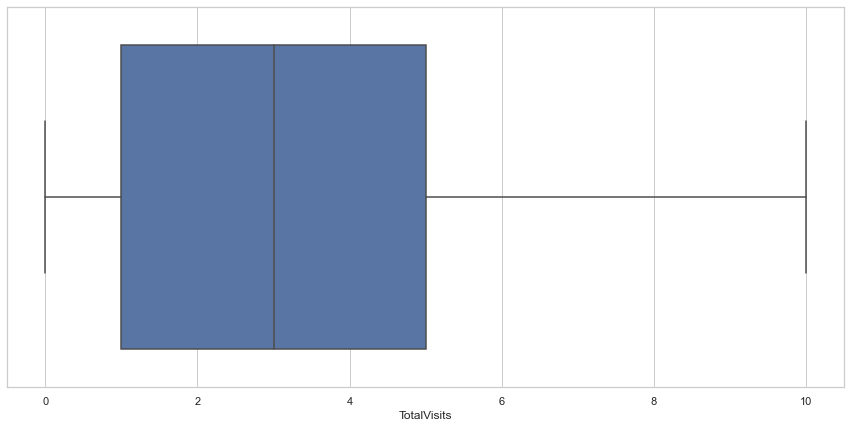

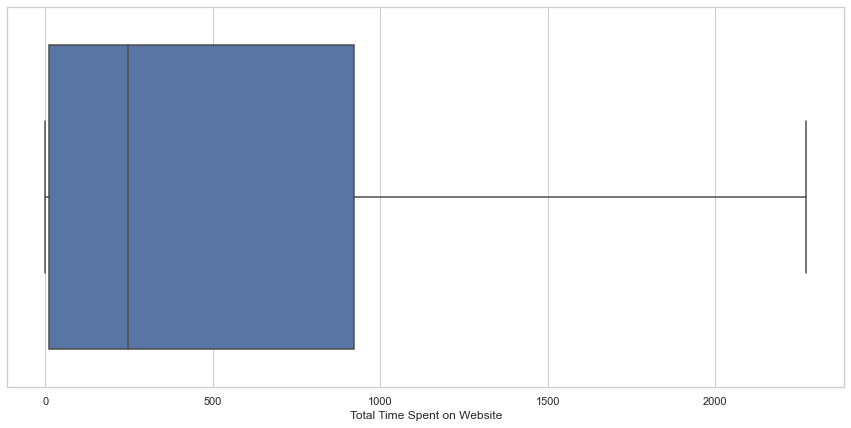

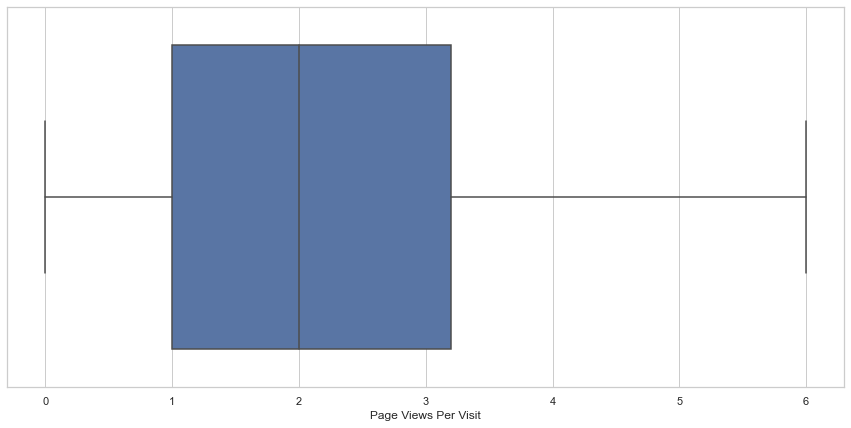

In [50]:
#ploting again to verify
for col in num_col:
    plt.figure(figsize = [15,7])
    sns.boxplot(leads[col])
    plt.show()

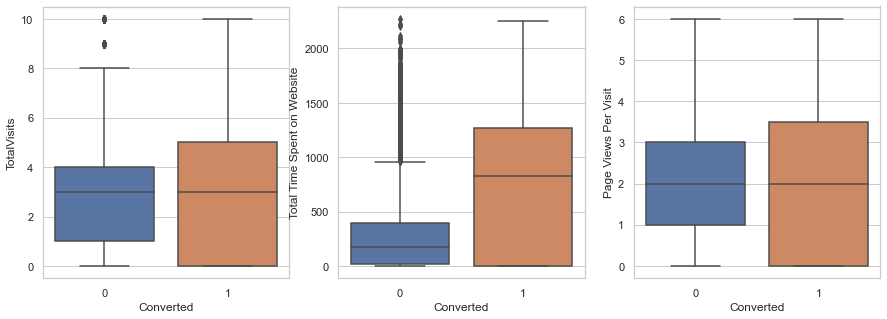

In [51]:
#Now lets plot these numerical variables against the Converted column
plt.figure(figsize=(15, 5))
for col in num_col:
    plt.subplot(1,3,num_col.index(col)+1)
    sns.boxplot(data = leads, y = col , x = 'Converted')
plt.show()

Our observations:
- TotalVisits has same median value for both converted and not converted, so not much conclusion can be drawn from this.
- In the Total Time Spent on Website are more likely to get converted. As peopple who are interested will spend more time on the website. This can also be general knowledge.
- Page View Per Visit also as same median so this also not much conclusion can be drawn.

Checking the correlation for numerical variables

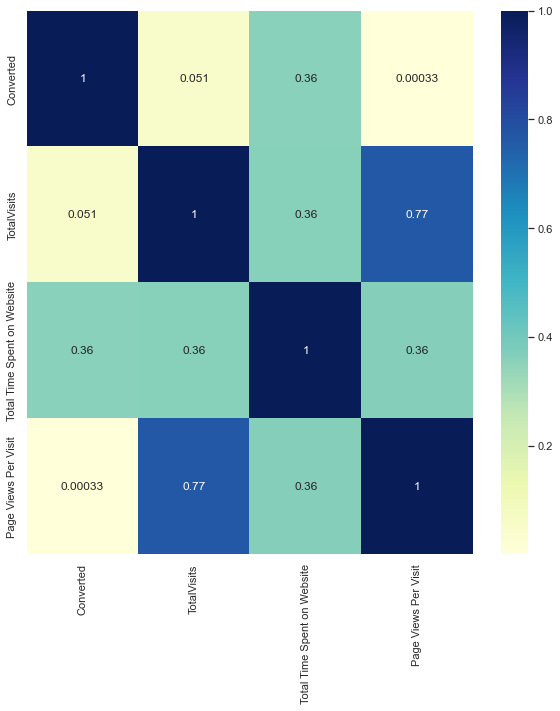

In [52]:
plt.figure(figsize = [10,10])
sns.heatmap(leads.corr(), cmap = "YlGnBu", annot = True)
plt.show()

### Categorical columns Visualization

In [53]:
#Storing all object dtype columns in a list
cat_col = list(leads.columns[leads.dtypes == "object"])
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [54]:
#Writing a function to create a countplot for all the above categorical variables against converted column
def countplot_cat(col):
    plt.figure(figsize=(20, 7))
    sns.countplot(data = leads, x = col, hue = "Converted")
    plt.xticks(rotation = 90)
    plt.show()

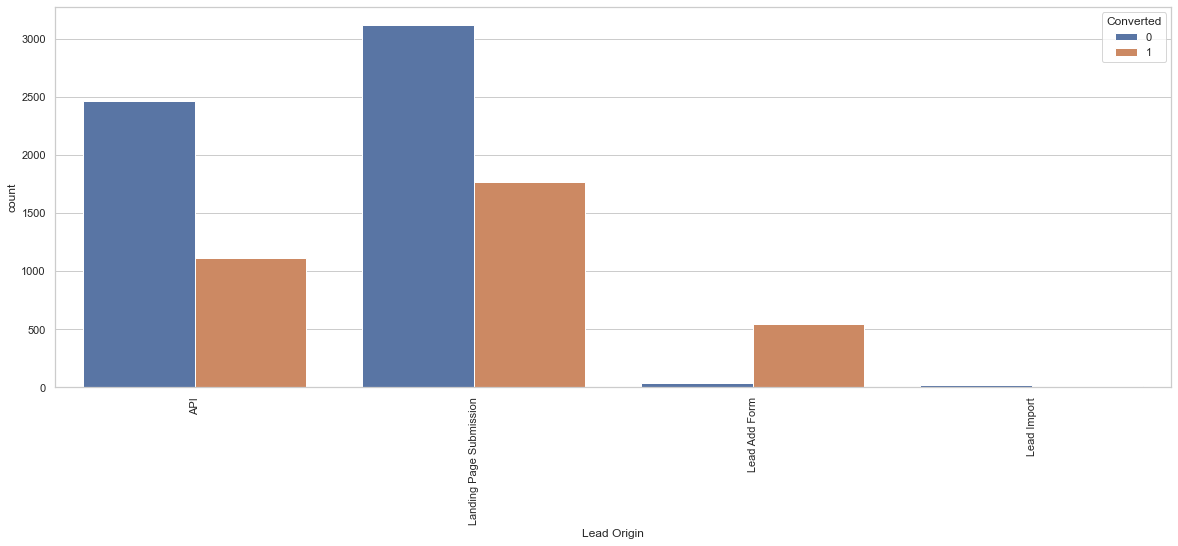

In [55]:
#Now lets go column by column
#For Column Lead Origin
countplot_cat("Lead Origin")

Upon inspection
- API and Landing Page Submission generate most of the leads but conversion rate for them are close to 40 to 50 percent.
- Lead Add Form generate less number of leads as compared to API and Landing Page Submission but the conversion rate is good.
- Lead Import does not so signicant

So we should try to increase the conversion rate for API and Landing Page Submission and increase leads using Lead Add Form.

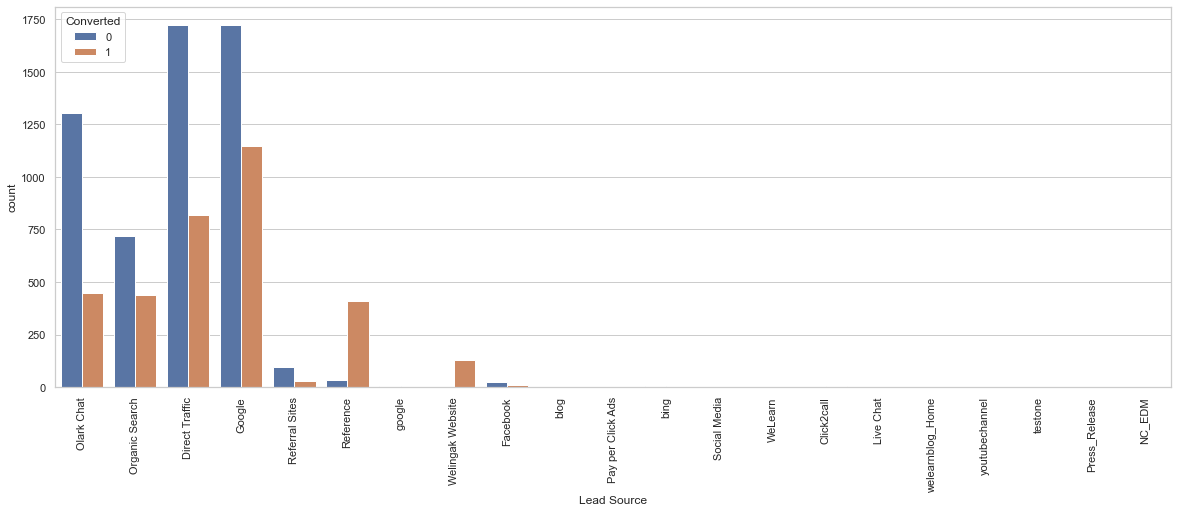

In [56]:
#Column Lead Source
countplot_cat("Lead Source")

Upon Inspection
- There is a spelling error for google, has it should be Google. So we need to convert these to right form.
- Lead generation after the facebook source are very neglible so lets see the piechart of it and put all of them into others category.
- Direct Traffic and Google generate most number leads but their conversion rate is low.
- Reference and Welingak Website generate less number fo leads compared to Direct trafiic and Google but their conversion rate is high.

In [57]:
#Now lets correct the spelling of Google
leads["Lead Source"] = leads["Lead Source"].replace("google", "Google")

In [58]:
#Cross-Checking
lead_source_val = leads["Lead Source"].unique()
lead_source_val

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

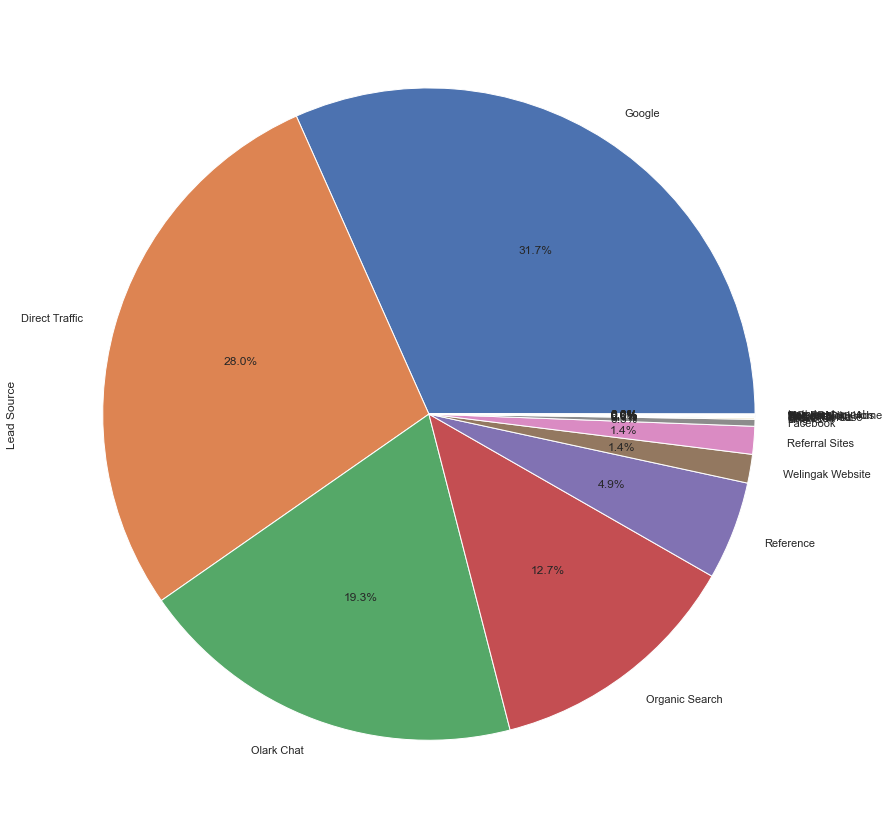

In [59]:
#piechart
plt.figure(figsize=[15,15])
leads["Lead Source"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

In [60]:
#Now lets keep the some major percentage columns as it is and all the columns with less than 1% converted to others value
#As we require first  categories only so....
leads["Lead Source"] = leads["Lead Source"].replace(lead_source_val[8:], "Others")

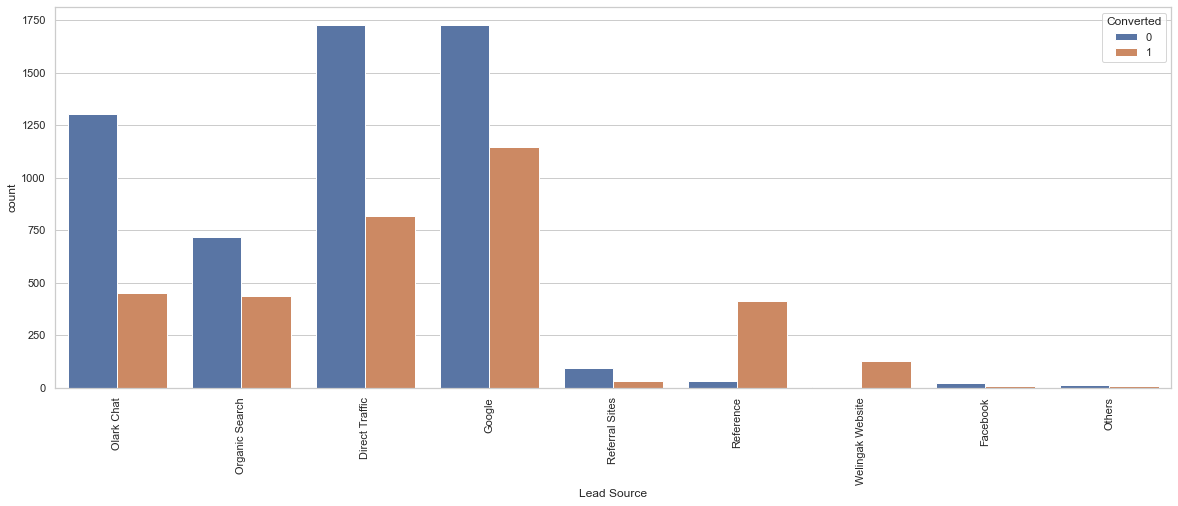

In [61]:
#Plotting again for Lead Source
countplot_cat("Lead Source")

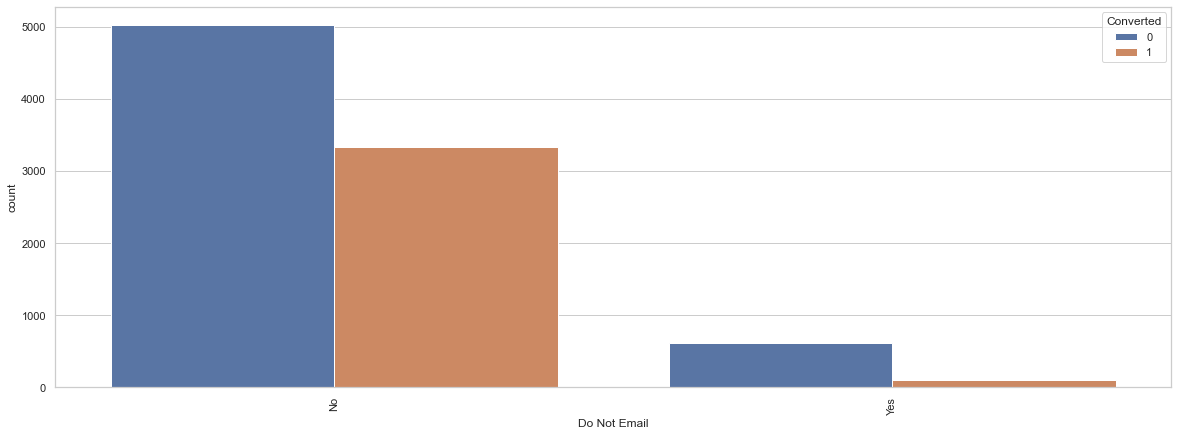

In [62]:
#For column Do Not Email
countplot_cat("Do Not Email")

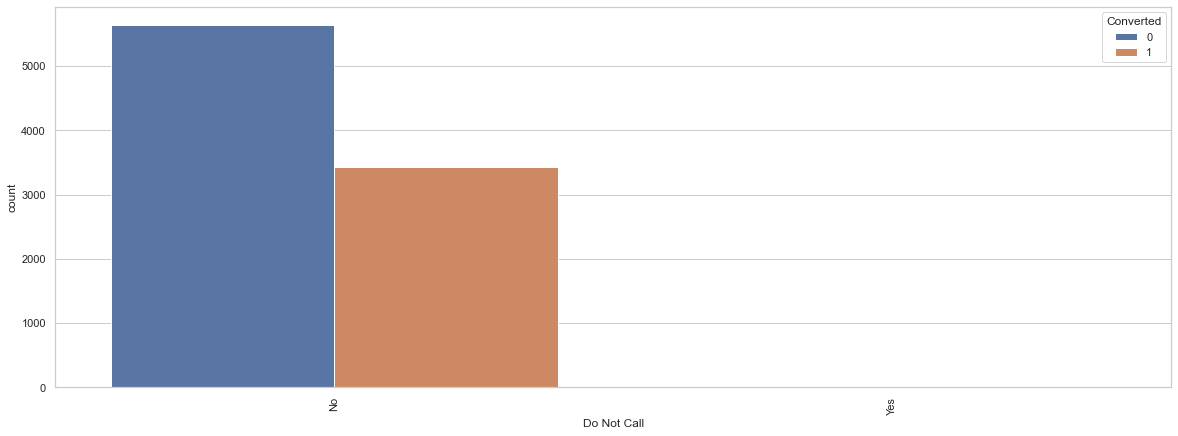

In [63]:
#For column Do Not Call
countplot_cat("Do Not Call")

For both these columns the data is highly imbalanced and one can expect most of the responses being NO.

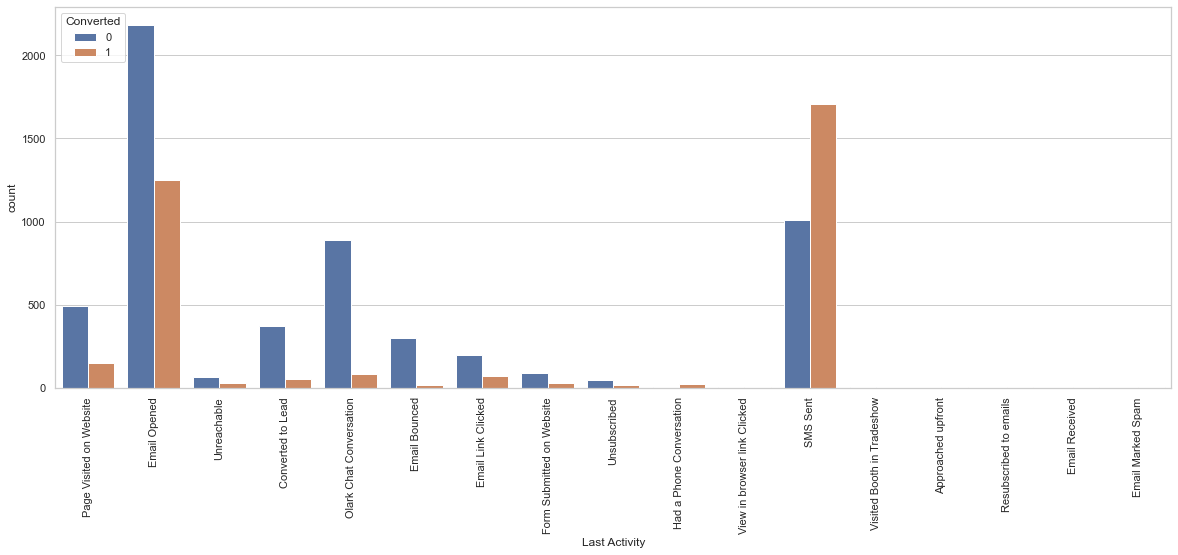

In [64]:
#Column Last Activity
countplot_cat("Last Activity")

Upon Inspection
- More number of leads are generated from Email opened and SMS Sent. For Email Opened conversion rate is less but for SMS Sent conversion rate is high.
- And categpories after SMS Sent are having negligible values so lets put them in Others categories.

In [65]:
last_activity_val = leads["Last Activity"].unique()
last_activity_val

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [66]:
#Reducing categories
leads["Last Activity"] = leads["Last Activity"].replace(last_activity_val[-5:], "Others")

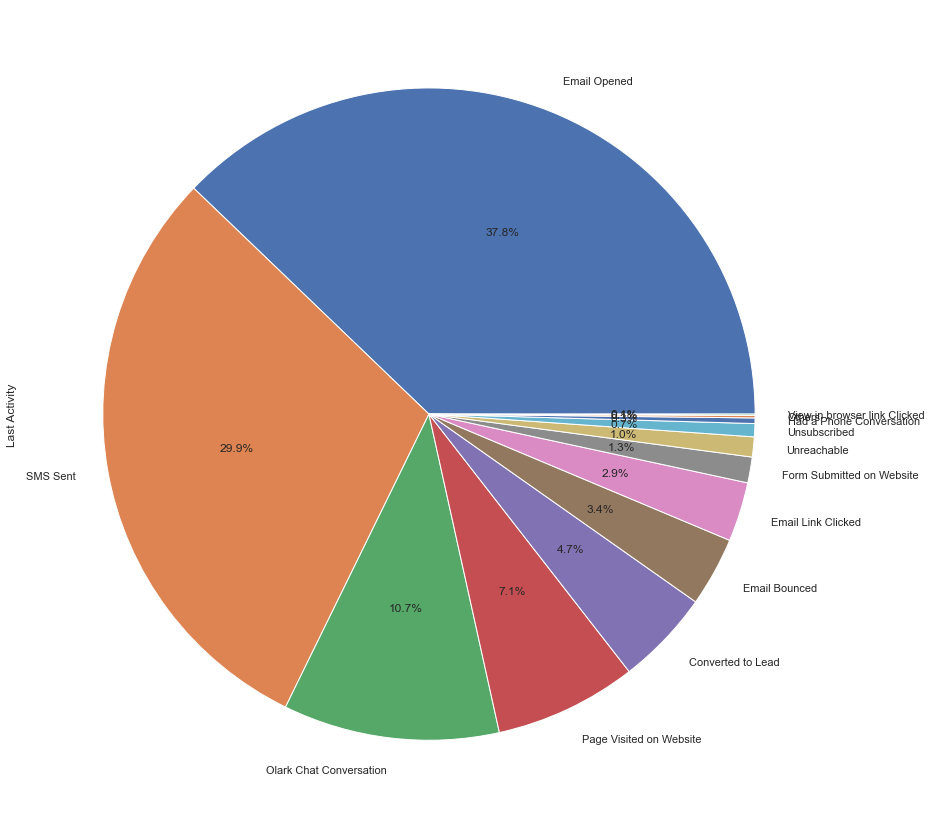

In [67]:
#piechart
plt.figure(figsize=[15,15])
leads["Last Activity"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

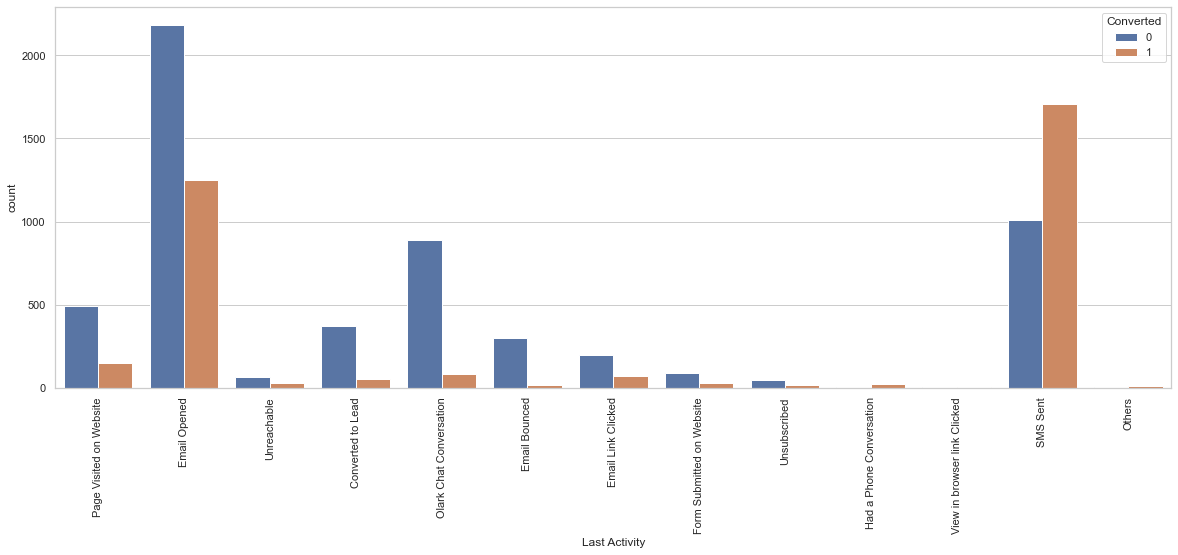

In [68]:
#Plotting again
countplot_cat("Last Activity")

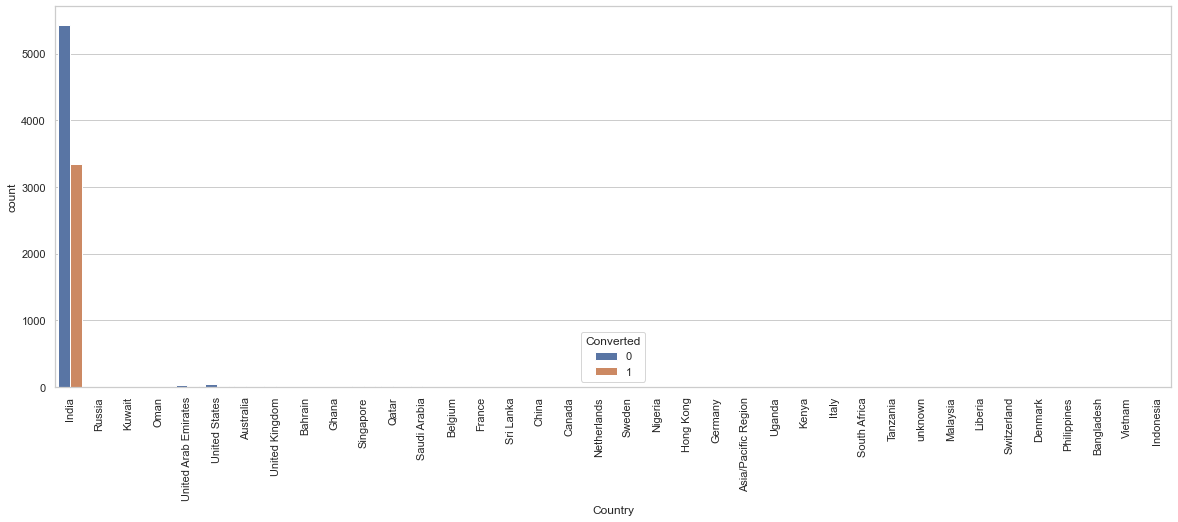

In [69]:
#Column Country
countplot_cat("Country")

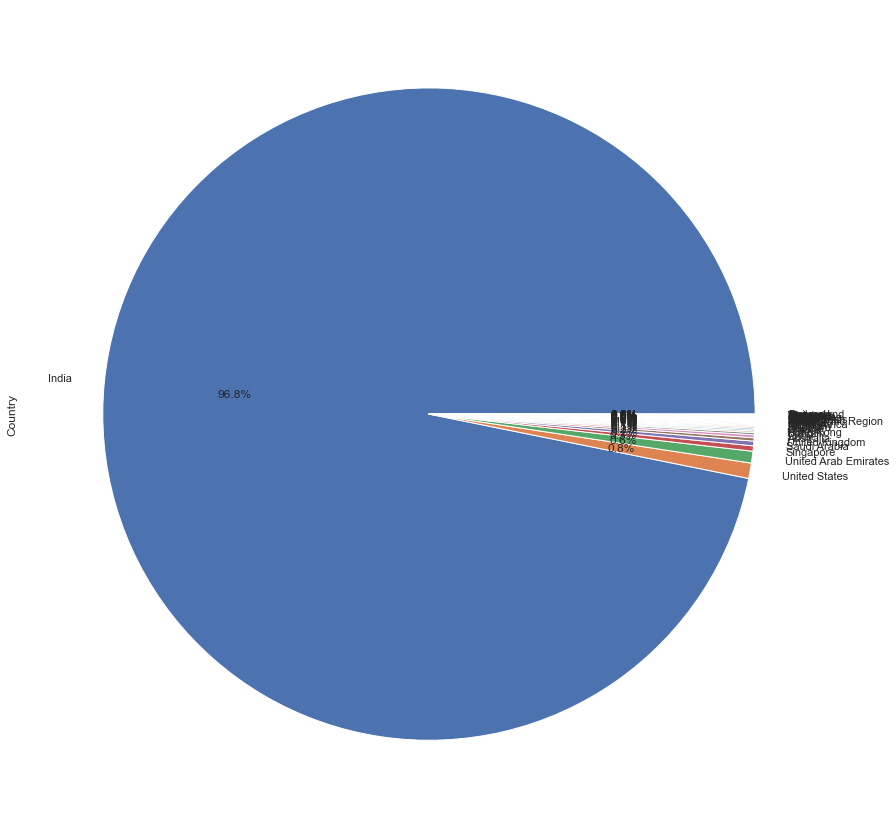

In [70]:
#piechart
plt.figure(figsize=[15,15])
leads["Country"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

Upon Inspecting
- 96.8 percent values are india all others are less than 1 percent values.
- 96.8 percent the leads are generated from India but their conversion rate is low. Others are not significant at all.

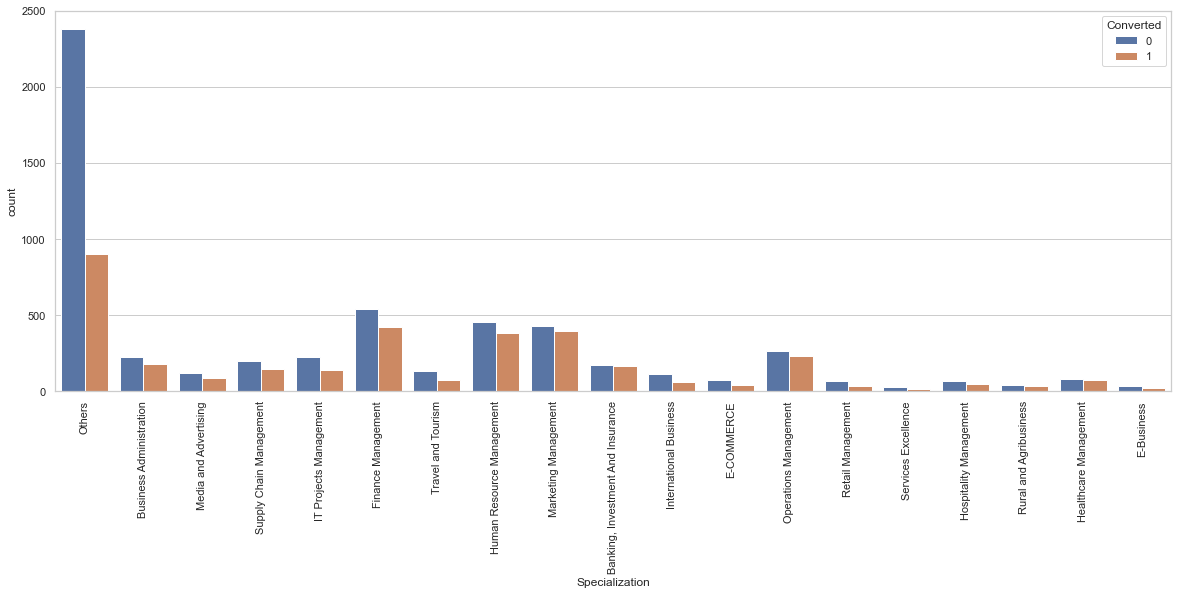

In [71]:
#Column Specialization
countplot_cat("Specialization")

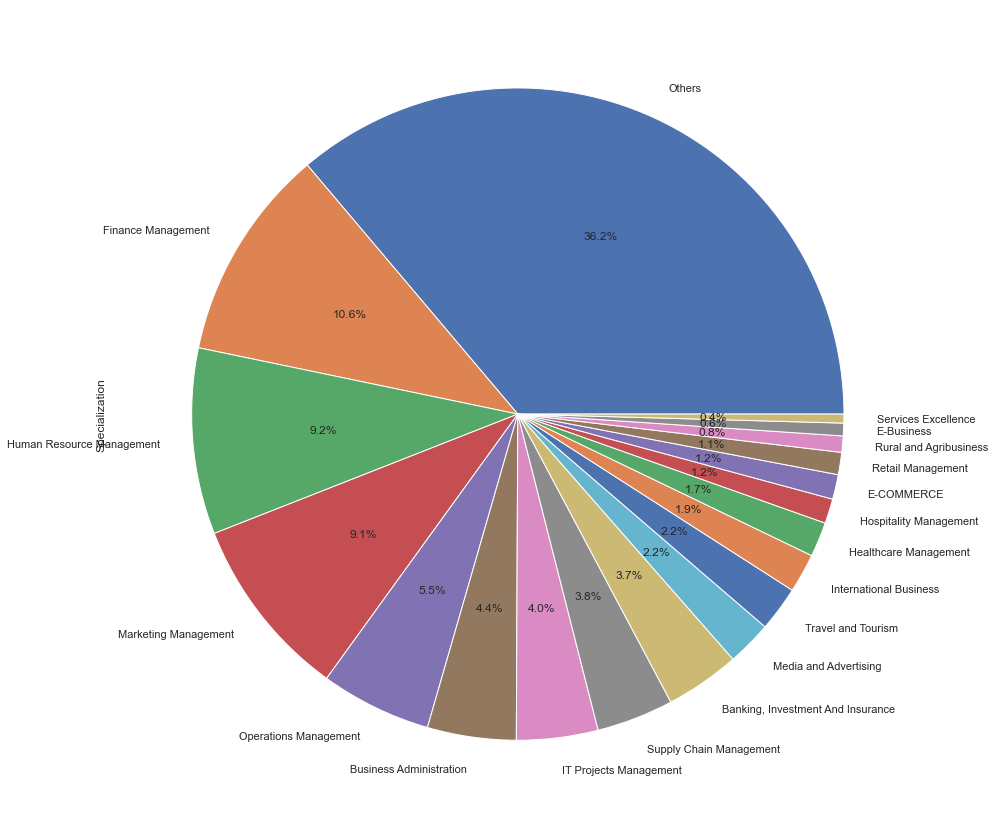

In [72]:
#piechart
plt.figure(figsize=[15,15])
leads["Specialization"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

Upon Inspecting
- Others seems to have generated more leads, but conversion rate is kind of low for all the columns.

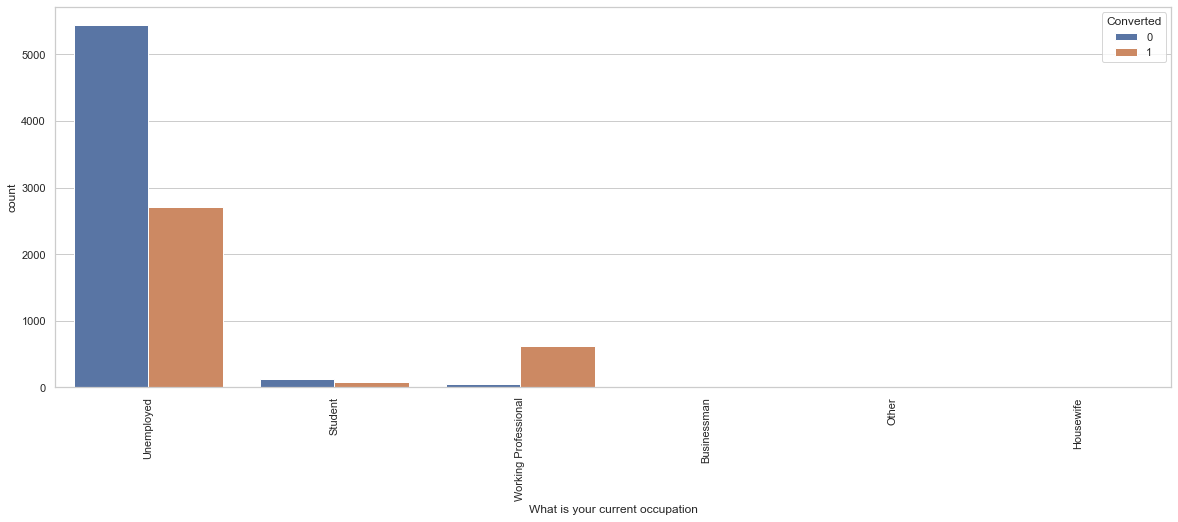

In [73]:
#for column What is your current occupation
countplot_cat("What is your current occupation")

Upon Inspecting
- More number of leads are generated by unemployed profile but their conversion rate is low, but Working Professional has very high conversion rate.

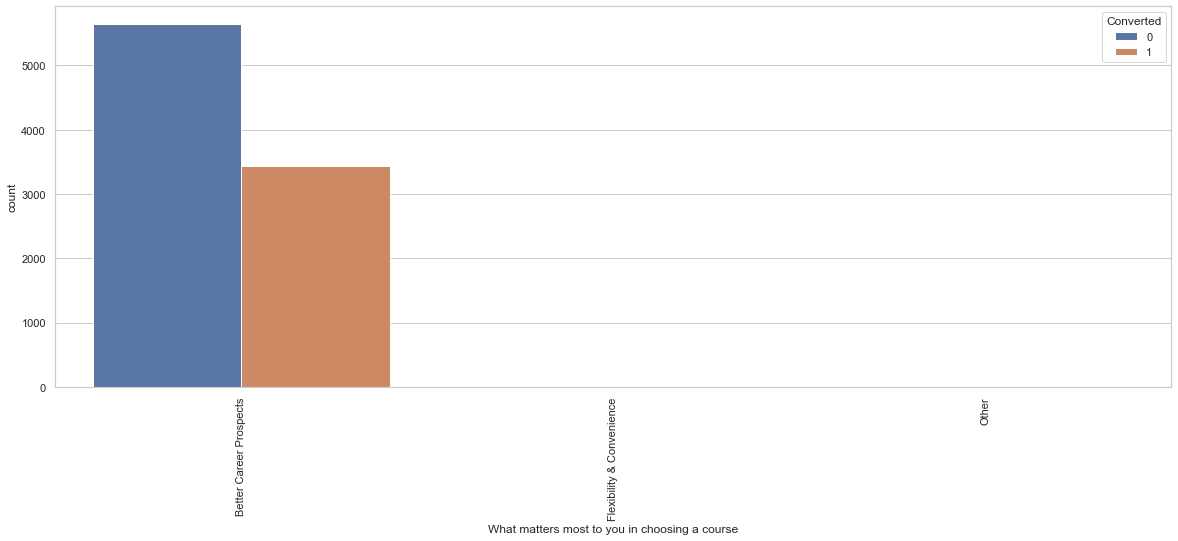

In [74]:
#For column What matters most to you in choosing a course
countplot_cat("What matters most to you in choosing a course")

Upon Inspecting
- This column What matters most to you in choosing a course has only 1 significant column with low conversion rate that is Better Carrer Prospects.

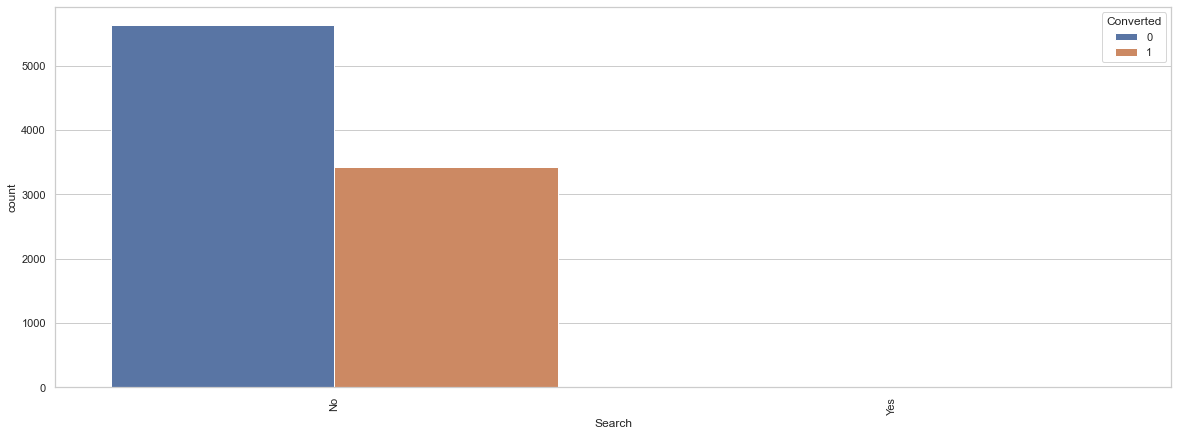

In [75]:
#For column Search
countplot_cat("Search")

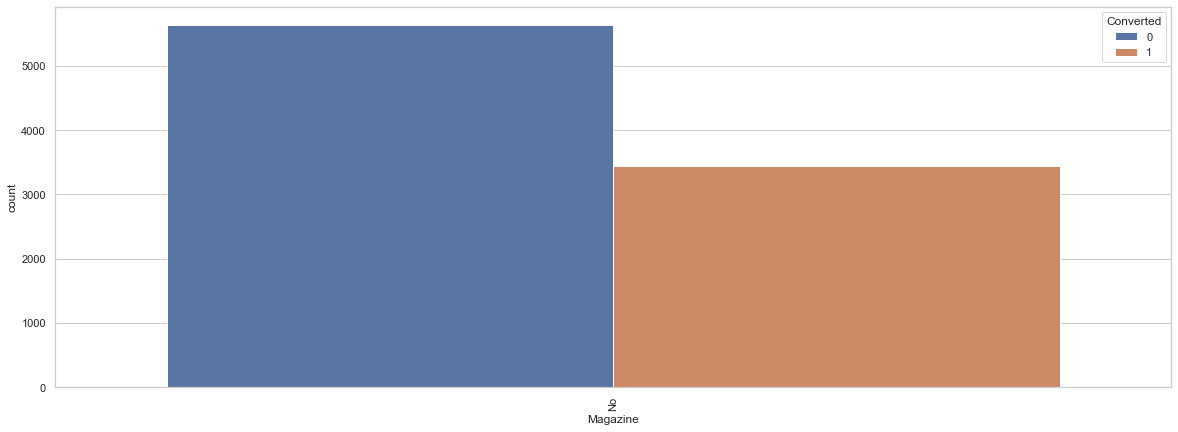

In [76]:
#For column Magazine
countplot_cat("Magazine")

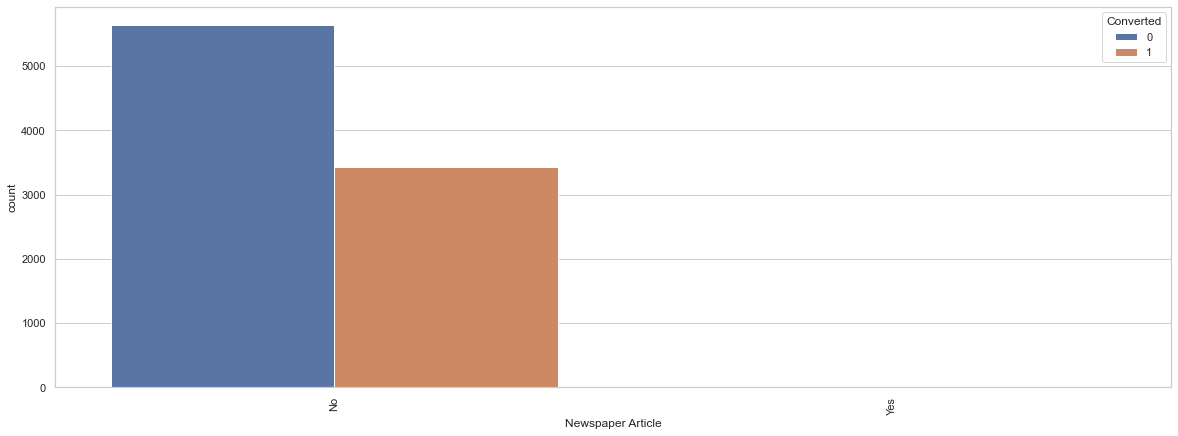

In [77]:
#For column Newspaper Article
countplot_cat("Newspaper Article")

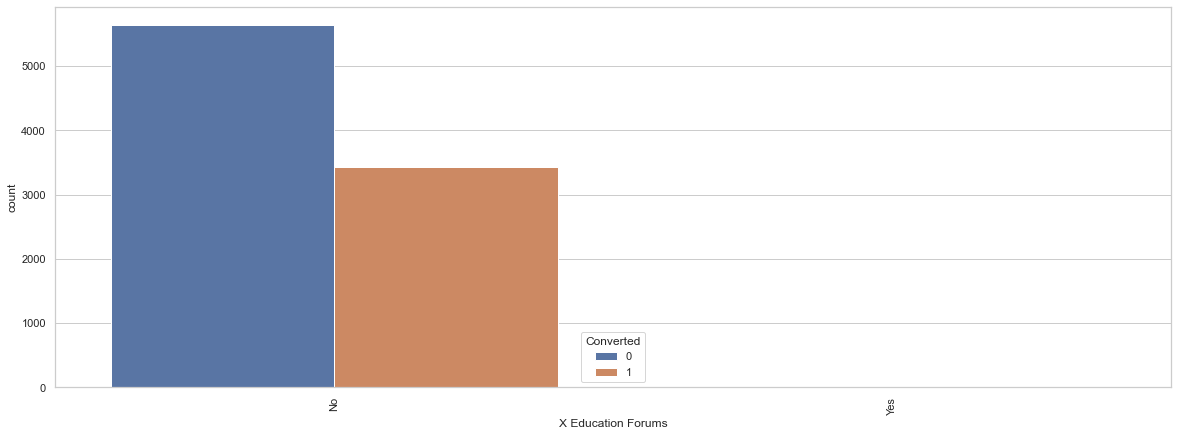

In [78]:
#For column X Education Forums
countplot_cat("X Education Forums")

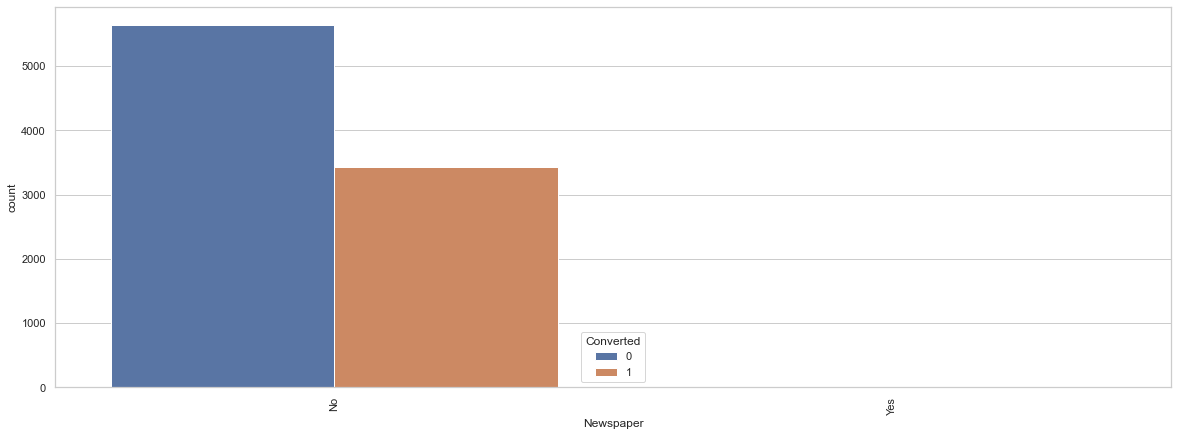

In [79]:
#For column Newspaper
countplot_cat("Newspaper")

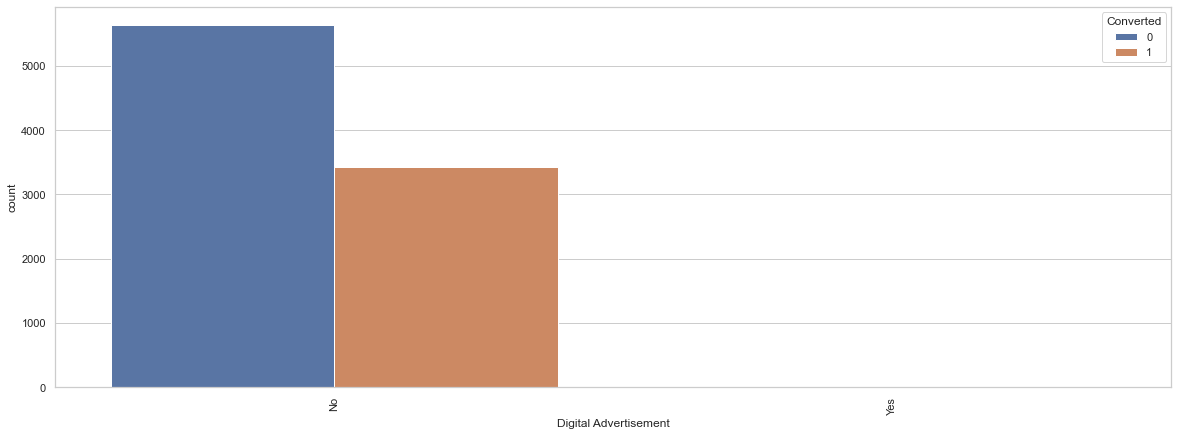

In [80]:
#For column Digital Advertisement
countplot_cat("Digital Advertisement")

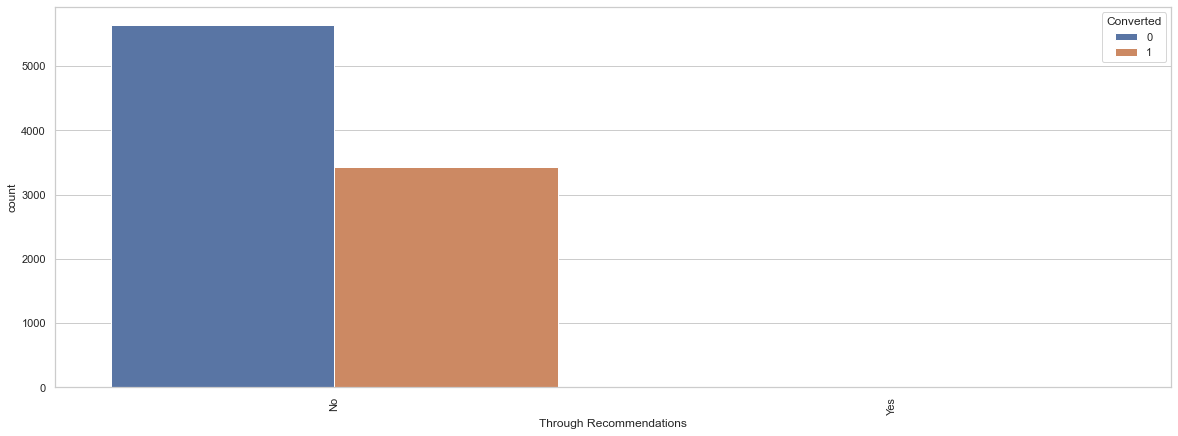

In [81]:
#For column Through Recommendations
countplot_cat("Through Recommendations")

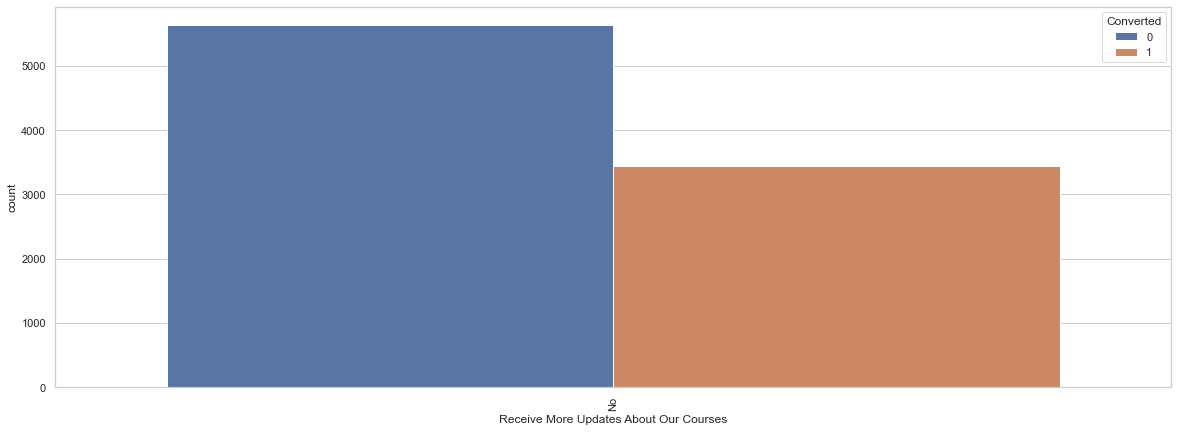

In [82]:
#For column Receive More Updates About Our Courses
countplot_cat("Receive More Updates About Our Courses")

For all of these columns that include  'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' and 'Receive More Updates About Our Courses' has most of the values as NO. And there is nothing significance that can be infered from these probably these are imbalanced data.

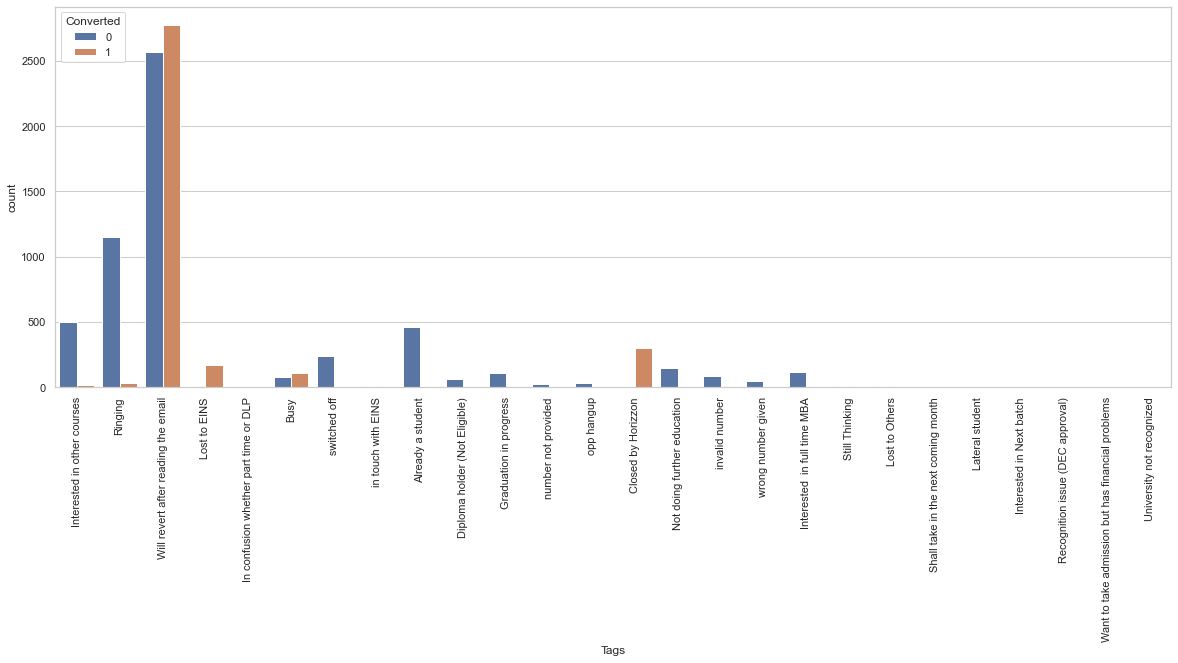

In [83]:
#For column Tags
countplot_cat("Tags")

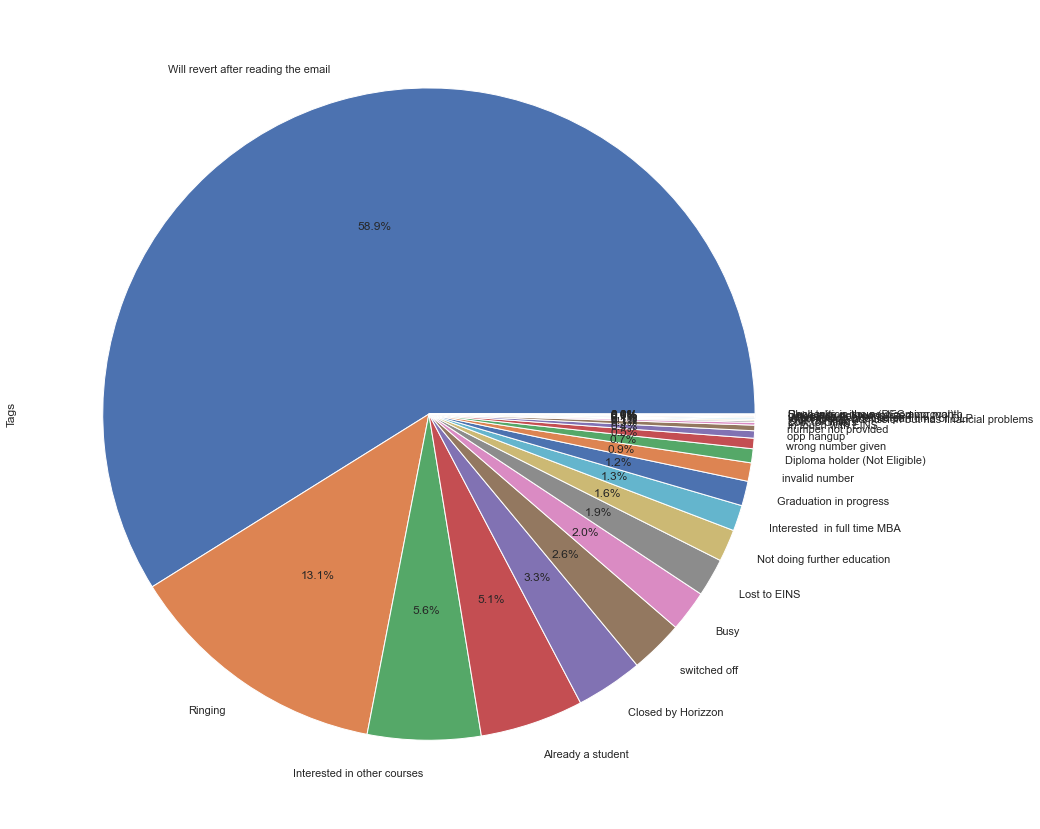

In [84]:
#piechart
plt.figure(figsize=[15,15])
leads["Tags"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

Upon Inspecting
- Will Revert after reading the email has more number of leads generated and has high conversion rate.
- And categpories after Interested in full time MBA has very less number of leads generated around less than 1.3%, so all of them put in Others category.

In [85]:
tags_val = leads["Tags"].unique()
tags_val

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [86]:
#reducing categories
leads["Tags"] = leads["Tags"].replace(tags_val[-8:], "Others")

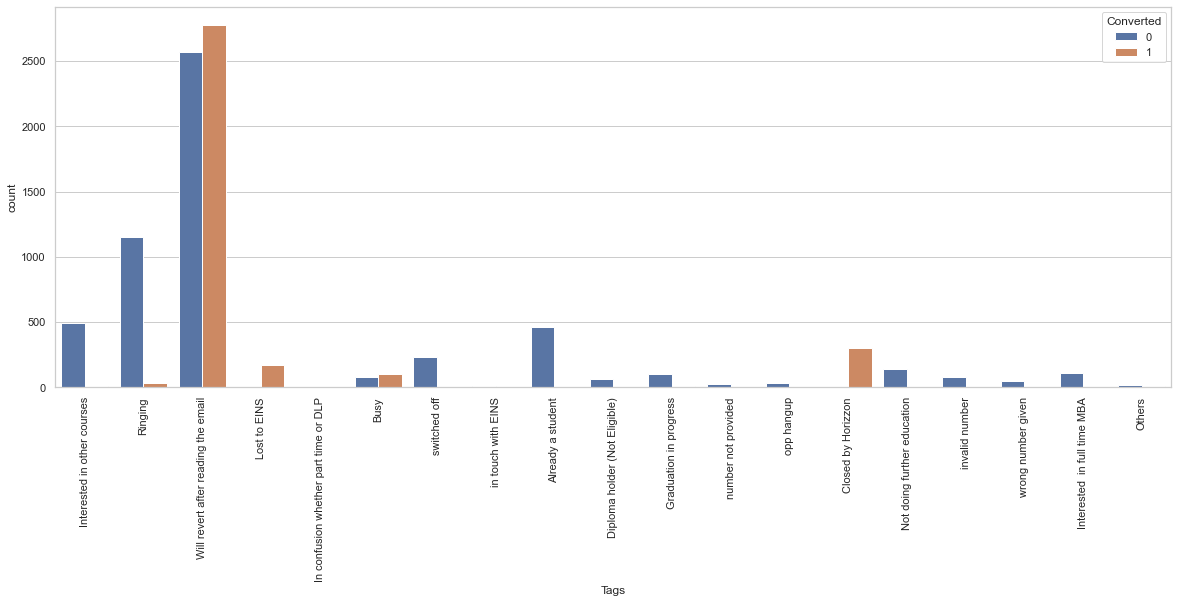

In [87]:
#Plotting again
countplot_cat("Tags")

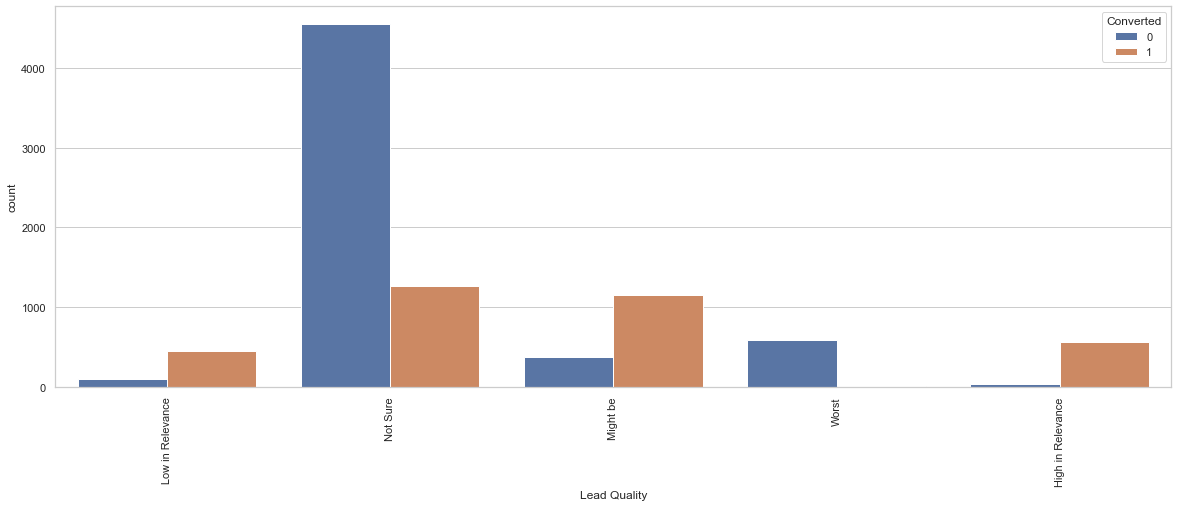

In [88]:
#For column Lead Quality
countplot_cat("Lead Quality")

Upon Inspecting
- Not Sure has more number of leads generated but their conversion rate is very low.
- Might be even though it has less number of leads generated as compared with Not Sure but it has high conversion rate. 
- And Worst has very low conversion rate close to negligible.

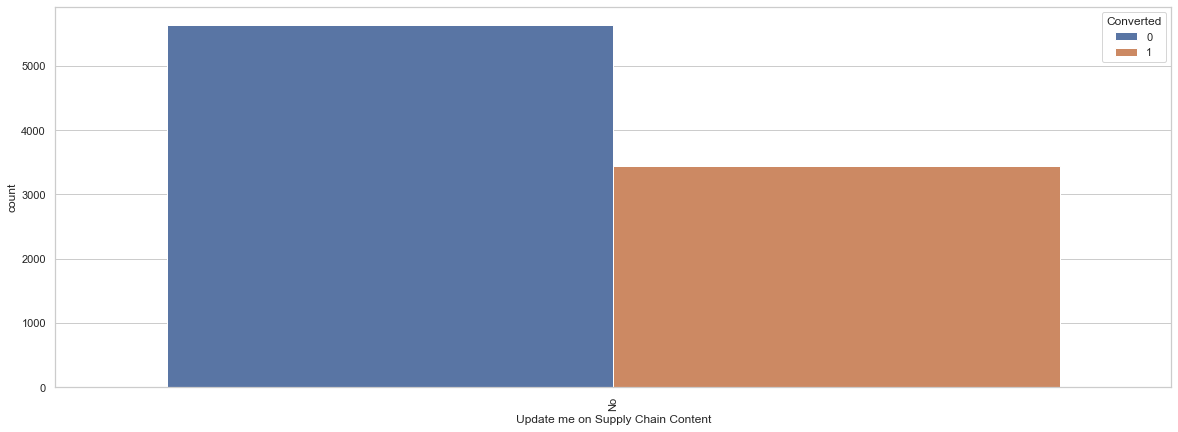

In [89]:
#For Column Update me on Supply Chain Content
countplot_cat("Update me on Supply Chain Content")

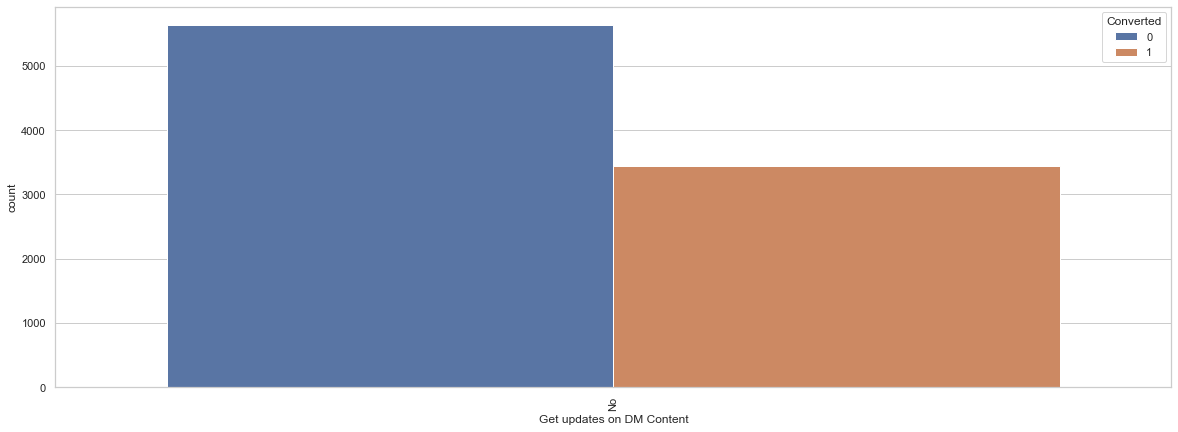

In [90]:
#For column Get updates on DM Content
countplot_cat("Get updates on DM Content")

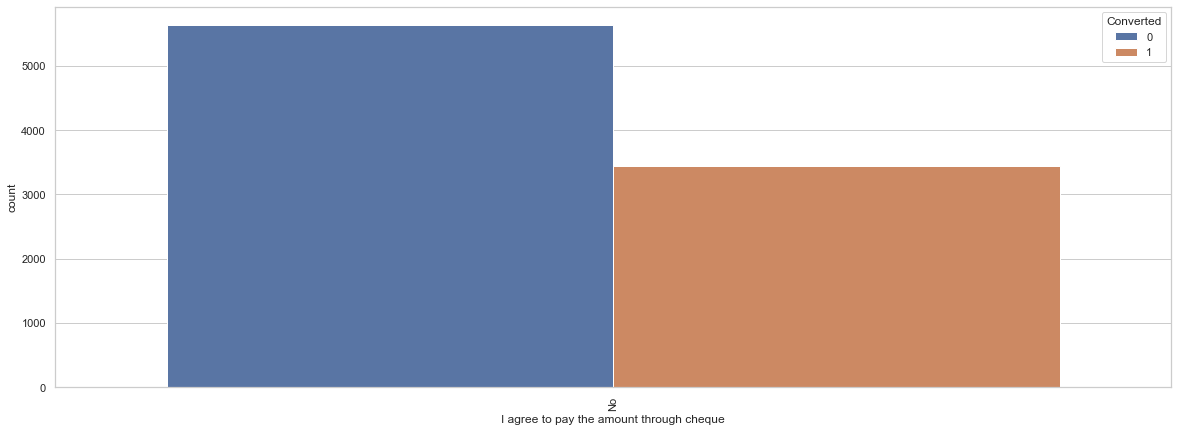

In [91]:
#For column I agree to pay the amount through cheque
countplot_cat("I agree to pay the amount through cheque")

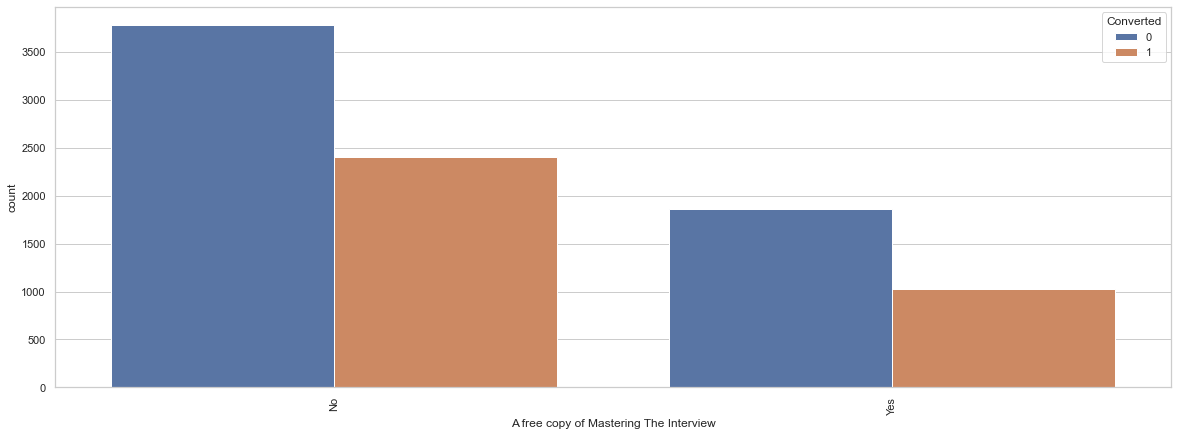

In [92]:
#For column A free copy of Mastering The Interview
countplot_cat("A free copy of Mastering The Interview")

For all these columns 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' and 'A free copy of Mastering The Interview' has only NO as significant, and according to data dictionary too we will not need these for our analysis and not much can be inferred from these columns.

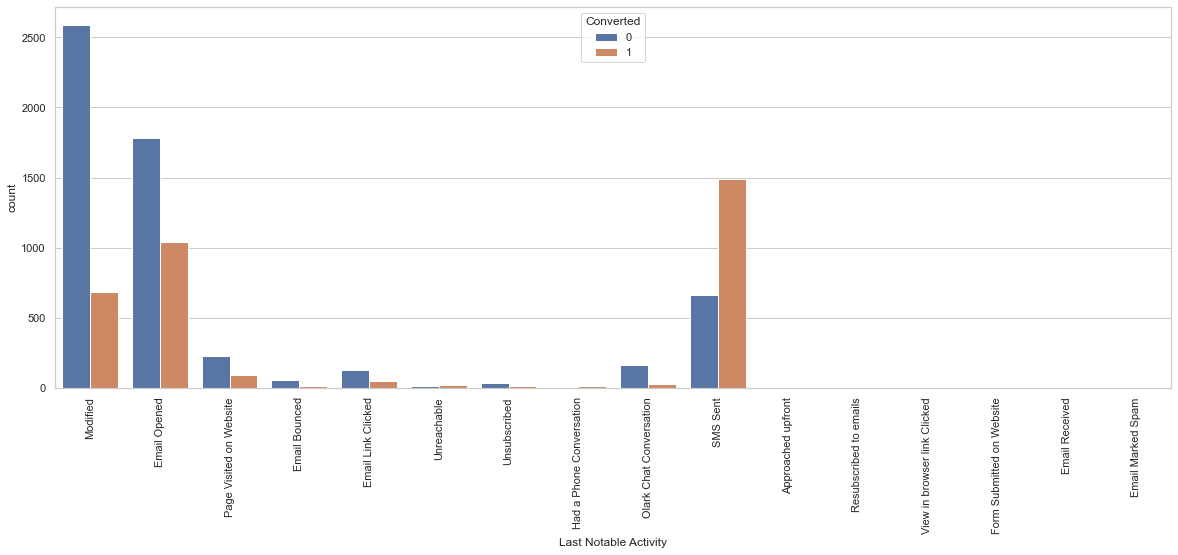

In [93]:
#For column Last Notable Activity
countplot_cat("Last Notable Activity")

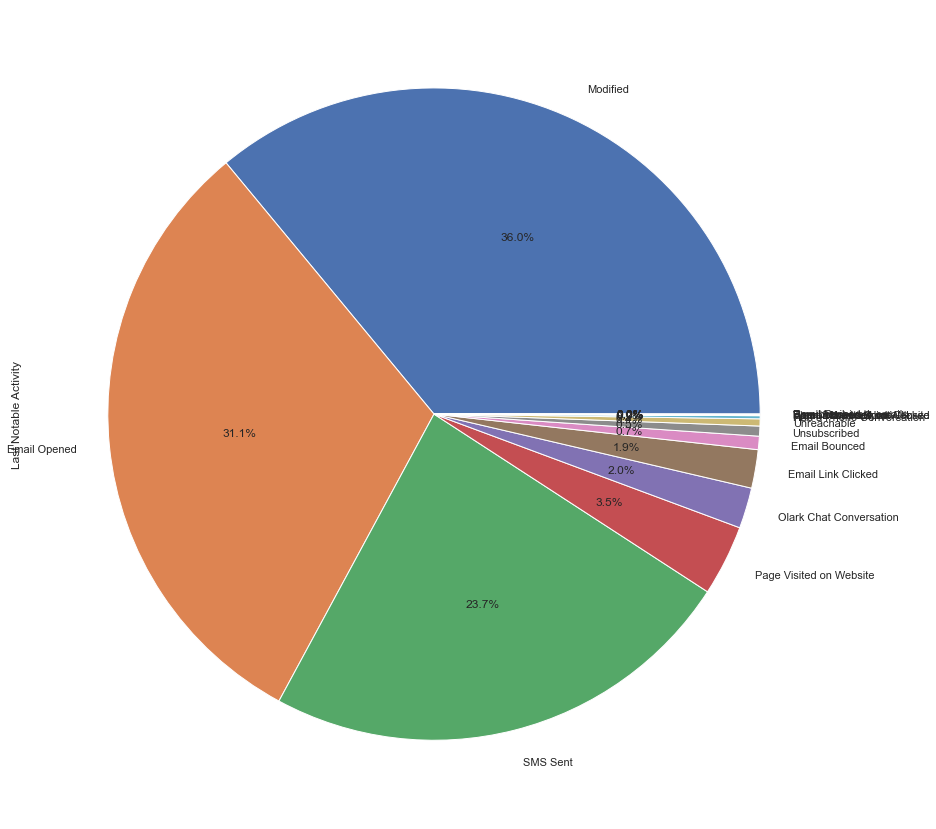

In [94]:
#piechart
plt.figure(figsize=[15,15])
leads["Last Notable Activity"].value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.show()

Upon Inspecting
- Modified has high number of leads generated but conversion rate is very low.
- SMS Sent has very high conversion rate.
- After SMS Sent we can combine all others to Others category

In [95]:
last_notable_activity_val = leads["Last Notable Activity"].unique()
last_notable_activity_val

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [96]:
#Combining after SMS Sent
#reducing categories
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(last_notable_activity_val[-6:], 'Others')

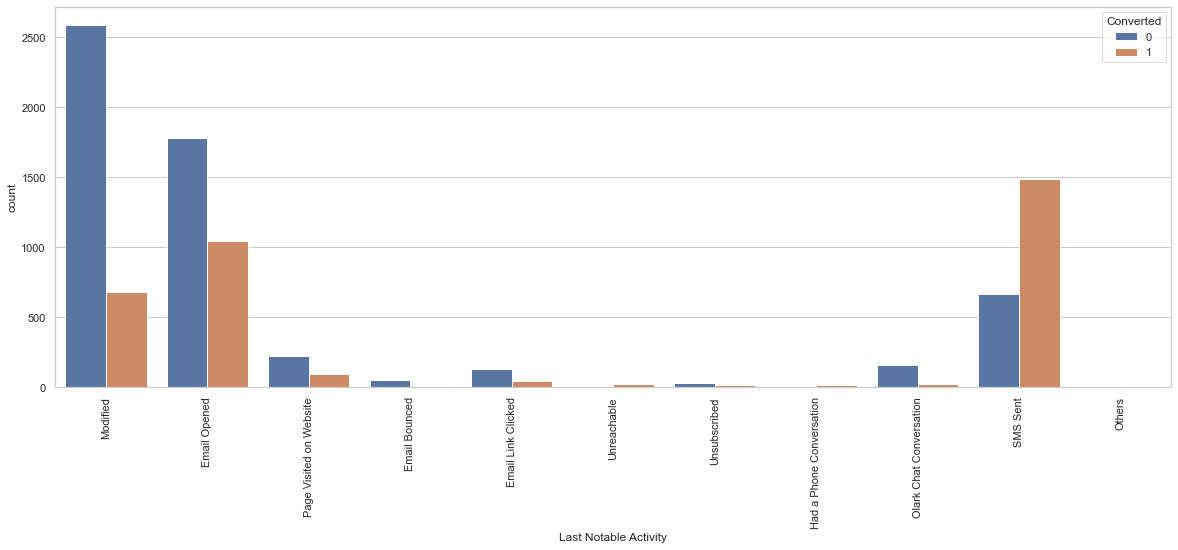

In [97]:
#Plotting again
countplot_cat("Last Notable Activity")

#### Now that data visualization is done for all variables we have some columns that will not be needed in our analysis, these columns are also cross checked from data dictionary file and can be removed from the dataset.

In [98]:
leads = leads.drop(["Do Not Call", "Country", "What matters most to you in choosing a course", "Search", "Magazine", 
                    "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", 
                    "Through Recommendations", "Receive More Updates About Our Courses", 
                    "Update me on Supply Chain Content", "Get updates on DM Content", 
                    "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"], axis = 1)

In [99]:
#Now checking head, info and shape of the dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [100]:
leads.shape

(9074, 13)

In [101]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  Last Notable Activit

# Data Preparation

In [102]:
#Converting all binary columns Yes/No to 0/1
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})

In [103]:
#Creating a df which contains only object columns
df_cate = leads.select_dtypes(include=['object'])
df_cate

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,API,Organic Search,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,Landing Page Submission,Google,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified
...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Others,IT Projects Management,Unemployed,Will revert after reading the email,High in Relevance,Others
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,wrong number given,Might be,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,invalid number,Not Sure,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unemployed,Will revert after reading the email,Not Sure,SMS Sent


In [104]:
#Creating dummy variables for the categorical columns
df_dummy = pd.get_dummies(df_cate, drop_first=True)
df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
#Now dropping these categorical columns from the original dataset.
leads = leads.drop(list(df_cate.columns), axis=1)

#Then concating the dummies dataset created above to the original dataset.
leads = pd.concat([leads, df_dummy], axis=1)

#checking the first few rows
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Model Building

In [106]:
#keeping the feature variable to X
X = leads.drop(["Converted"], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
#keeping the response variable to y
y = leads["Converted"]

#checking head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
#Splitting the dataframe in the sizes of 70 and 30 respective the train and test.
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [109]:
print(y_train)

3009    0
1012    0
9226    0
4750    1
7987    1
       ..
367     0
82      1
8199    0
7077    0
5754    0
Name: Converted, Length: 6351, dtype: int64


#### Feature Scaling

In [110]:
#Initialization
scaler = StandardScaler()

In [111]:
#Numerical columns
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [112]:
#Applying scaler function to numerical columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [113]:
#Checking the conversion rate
conversion_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion_rate

37.85541106458012

#### Using RFE for feature selection

In [114]:
#Initialization for logistic regression
logreg = LogisticRegression()

In [115]:
# Recursive feature elimination 
rfe = RFE(logreg, 15)       #RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [116]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 67),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 58),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 63),
 ('Last Activity_Form Submitted on Website', False, 65),
 ('Last Activity_Had a Phone Conversation', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Others', False, 32),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last

In [117]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [118]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthca

#### Assessing the model with statsmodel

In [119]:
#Generic function for model building
def build_model(X,y):
    X_sm = sm.add_constant(X)    #adding a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    #fitting the model
    print(logm.summary())        #summary of the model  
    return X_sm, logm

In [120]:
#Generic function to calculate VIF of variables
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [121]:
#Generic function for making predictions
def pred(X, logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    #creating a dataframe to store both original and the predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    
    #using the default threshold of 0.5
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [122]:
#Generic function for all metrics calculations

#Function for confusion matrix and accuracy
def conf_acc(converted, predicted):
    confusion = metrics.confusion_matrix(converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Accuracy: ", metrics.accuracy_score(converted, predicted))
    return confusion

#Function for other metrics
def other_met(confusion_mat):
    TP = confusion_mat[1,1]    #true positives 
    TN = confusion_mat[0,0]    #true negatives
    FP = confusion_mat[0,1]    #false positives
    FN = confusion_mat[1,0]    #false negatives
    
    print("Sensitivity is: ", TP / float(TP+FN))
    print("Specificity is: ", TN / float(TN+FP))
    print("False postive rate - predicting lead conversion when the lead does not convert is: ", FP/ float(TN+FP))
    print("Positive predictive value is: ", TP / float(TP+FP))
    print("Negative predictive value is: ", TN / float(TN+FN))

In [123]:
#Model 1
X1, logm1 = build_model(X_train[col], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1579.7
Date:                Tue, 19 Dec 2023   Deviance:                       3159.4
Time:                        19:16:55   Pearson chi2:                 3.13e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

As Tags_invalid number has high p-value that is greater than 0.05 and hence it is insignificant, lets drop it and build the model again

In [124]:
col1 = col.drop("Tags_invalid number", 1)

In [125]:
#Model 2
#Re-building the model
X2, logm2 = build_model(X_train[col1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.8
Date:                Tue, 19 Dec 2023   Deviance:                       3171.6
Time:                        19:16:55   Pearson chi2:                 3.08e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

As Tags_number not provided has high p-value that is greater than 0.05 and hence it is insignificant, lets drop it and build the model again

In [126]:
col2 = col1.drop("Tags_number not provided", 1)

In [127]:
#Model 3
#Re-building the model
X3, logm3 = build_model(X_train[col2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Tue, 19 Dec 2023   Deviance:                       3177.6
Time:                        19:16:55   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now all the features has p-value \<0.05, that is close to 0, which means they are all significant.

In [128]:
#Lets check Variance Influence Factor
VIF(X3)

,Features,VIF
0,const,12.69
9,Tags_Will revert after reading the email,2.48
8,Tags_Ringing,1.84
12,Lead Quality_Worst,1.67
11,Lead Quality_Not Sure,1.53
2,Lead Origin_Lead Add Form,1.52
6,Tags_Closed by Horizzon,1.39
3,Lead Source_Welingak Website,1.35
4,What is your current occupation_Working Profes...,1.22
10,Tags_switched off,1.19


Ignoring constant all other features are less than value 5, so they are seem good here.

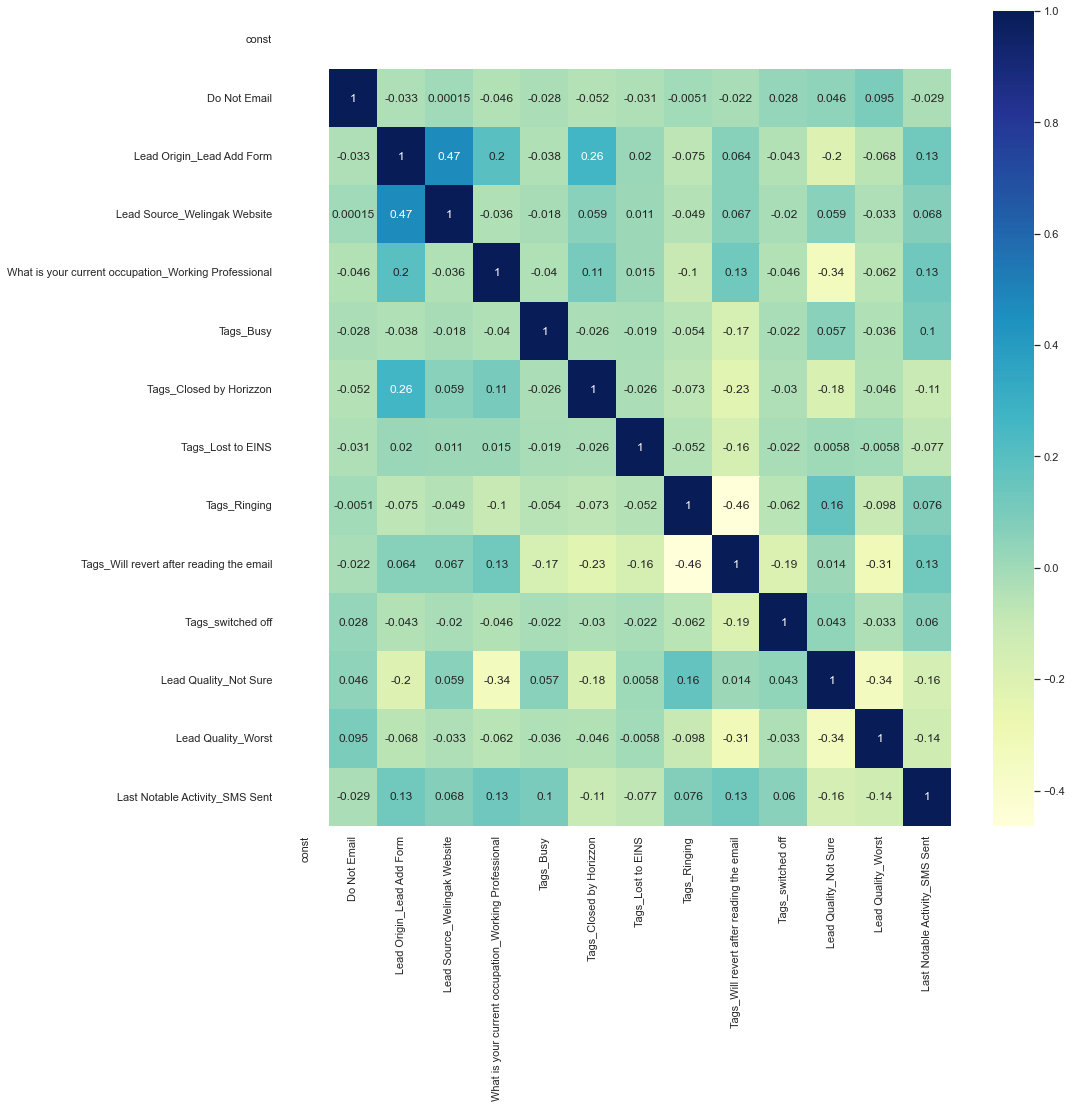

In [129]:
#Plotting the correlation
plt.figure(figsize = (15,15))  
sns.heatmap(X3.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In Model 3
- p-value are all less than 0.05, close to 0.
- VIF values for all the features are less than 5.
- Through heatmap we can see that there is not much multicollinearity present in the model.

So, all the features seems significant and we will proceed to making predictions using this model and eventually evaluating it.

### Making Predictions


In [130]:
y_train_pred_final = pred(X3, logm3)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


In [131]:
#Confusion_matrix
confusion = conf_acc(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3756  149]
 [ 363 2083]]
Accuracy:  0.9193827743662415


In [132]:
#Other Metrics
other_met(confusion)

Sensitivity is:  0.8515944399018807
Specificity is:  0.9618437900128041
False postive rate - predicting lead conversion when the lead does not convert is:  0.038156209987195905
Positive predictive value is:  0.9332437275985663
Negative predictive value is:  0.9118718135469774


### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False)

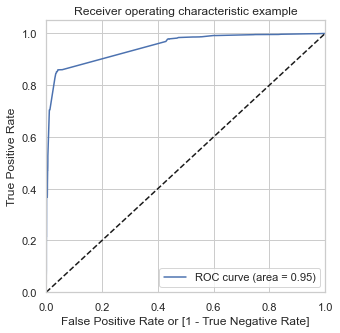

In [135]:
#plotting ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ideal ROC Curve value should be close to 1. And we are getting value of 0.95 which indicates that it is a good predictive model.

### Finding Optimal Cutoff point

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [137]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705873  0.981603  0.533163
0.2   0.2  0.910408  0.859771  0.942125
0.3   0.3  0.918910  0.859362  0.956210
0.4   0.4  0.920013  0.858136  0.958771
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919225  0.845053  0.965685
0.8   0.8  0.878287  0.705233  0.986684
0.9   0.9  0.813258  0.524530  0.994110


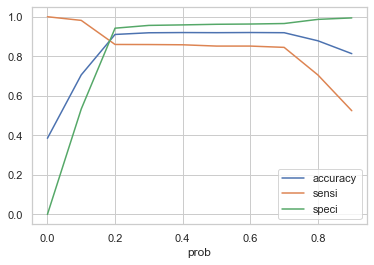

In [138]:
#plotingt accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the figure above 0.2 is the optimum point to take it as a cutoff probability.

In [139]:
#using 0.2 threshold for making predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted', 'Converted_prob', 'Lead ID', 'predicted', 'final_predicted', 'Lead_Score']].head()

,Converted,Converted_prob,Lead ID,predicted,final_predicted,Lead_Score
0,0,0.188037,3009,0,0,19
1,0,0.194070,1012,0,0,19
2,0,0.000805,9226,0,0,0
3,1,0.782077,4750,1,1,78
4,1,0.977003,7987,1,1,98


In [141]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2103
0     343
Name: final_predicted, dtype: int64

In [142]:
#Percentage
(2103/float(2103+343))*100

85.97710547833198

In [143]:
#Confusion_matrix
confusion1 = conf_acc(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3679  226]
 [ 343 2103]]
Accuracy:  0.9104078097937333


In [144]:
#Other Metrics
other_met(confusion1)

Sensitivity is:  0.8597710547833197
Specificity is:  0.9421254801536492
False postive rate - predicting lead conversion when the lead does not convert is:  0.05787451984635083
Positive predictive value is:  0.9029626449119794
Negative predictive value is:  0.9147190452511188


### Precision and Recall


In [145]:
# Precision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

In [146]:
# Recall TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

Using sklearn utilities for the same

In [147]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9332437275985663

In [148]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

### Precision and recall tradeoff

In [149]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


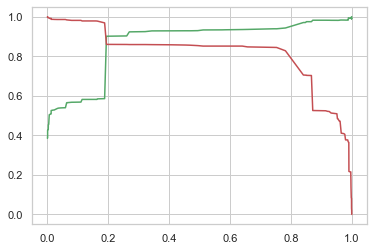

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [152]:
#feature transform on the test set
X_test[num_col] = scaler.fit_transform(X_test[num_col])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [153]:
#getting final features
X_test_sm = X_test[col2]

#adding a constant
X_test_sm = sm.add_constant(X_test_sm)

# Making predictions
y_test_pred = logm3.predict(X_test_sm)
y_test_pred[:10]

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
1800    0.961508
6507    0.012329
4821    0.000445
4223    0.996691
4714    0.188037
dtype: float64

In [154]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [155]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [157]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [160]:
# the threshold of 0.2
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.188037,0
1,1,1490,0.961508,1
2,0,7936,0.188037,0
3,1,4216,0.999049,1
4,0,3830,0.188037,0


In [161]:
# Confusion matrix and overall accuracy
confusion_test = conf_acc(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1635   99]
 [ 155  834]]
Accuracy:  0.906720528828498


In [162]:
# Other metrics
other_met(confusion_test)

Sensitivity is:  0.8432760364004045
Specificity is:  0.9429065743944637
False postive rate - predicting lead conversion when the lead does not convert is:  0.05709342560553633
Positive predictive value is:  0.8938906752411575
Negative predictive value is:  0.9134078212290503
